In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from statannotations.Annotator import Annotator

In [2]:
models = ['PDBbind_minimized_v18_subset','PLANet_v18', 'PDBbind_minimized_v18_subset_union_PLANet_v18']
tps = ['cmx', 'lig_alone']

In [3]:
test_dir = '/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/test_result'

# PLANet_hold_out_2019

In [5]:
PLANet_hold = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/index/minimized/PLANet_hold_out_2019.csv', sep='\t')
PLANet_hold

,unique_identify,-logAffi
0,CHEMBL1075159_5vfd_CHEMBL4298137,6.163784
1,CHEMBL1075317_6dar_CHEMBL4276691,5.899629
2,CHEMBL1075317_6dar_CHEMBL4276791,6.732828
3,CHEMBL1075317_6dar_CHEMBL4276998,5.407823
4,CHEMBL1075317_6dar_CHEMBL4277278,5.142065
...,...,...
5878,CHEMBL6154_5nut_CHEMBL4290134,8.060481
5879,CHEMBL6154_5nut_CHEMBL4447252,7.978811
5880,CHEMBL6154_5nut_CHEMBL4455904,7.920819
5881,CHEMBL6154_5nut_CHEMBL4475367,7.886057


In [59]:
PLANet_property = pd.read_csv('/pubhome/xli02/project/PLIM/analysis/20220812_paper/distribution/property/PLANet_property.csv', sep='\t')
PLANet_property

,unique_identify,-logAffi,Target_chembl_id,Cry_lig_name,Cry_lig_smiles,Cry_lig_an,Similar_compnd_name,Similar_compnd_smiles,Similar_compnd_an,Similarity,...,MCS_smarts,target_compnd,mw,logp,rotb,hbd,hba,q,HA,dataset
0,CHEMBL1075026_1swr_CHEMBL857,14.000000,CHEMBL1075026,1swr,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@H]12,16,CHEMBL857,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@H]12,16,1.000000,...,[#6](-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]1...,CHEMBL1075026_CHEMBL857,243.308,-0.5379,5.0,2.0,4.0,-1.0,16.0,PLANet
1,CHEMBL1075027_1hp5_CHEMBL257158,4.698970,CHEMBL1075027,1hp5,CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)S1,14,CHEMBL257158,CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)S1,14,1.000000,...,[#6]12-&@[#6](-&@[#16]-&@[#6](=&@[#7]-&@1)-&!@...,CHEMBL1075027_CHEMBL257158,219.262,-1.0408,1.0,3.0,6.0,0.0,14.0,PLANet
2,CHEMBL1075027_1hp5_CHEMBL403756,4.000000,CHEMBL1075027,1hp5,CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)S1,14,CHEMBL403756,CC1=N[C@H]2[C@H](O[C@H](CO)[C@H](O)[C@@H]2O)S1,14,1.000000,...,[#6]12-&@[#6](-&@[#16]-&@[#6](=&@[#7]-&@1)-&!@...,CHEMBL1075027_CHEMBL403756,219.262,-1.0408,1.0,3.0,6.0,0.0,14.0,PLANet
3,CHEMBL1075027_1hp5_CHEMBL404356,3.698970,CHEMBL1075027,1hp5,CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)S1,14,CHEMBL404356,CC1=N[C@@H]2[C@@H](O)[C@H](O)[C@@H](CO)O[C@]2(...,15,0.824870,...,[#6]12-&@[#6](-&@[#16]-&@[#6](=&@[#7]-&@1)-&!@...,CHEMBL1075027_CHEMBL404356,233.289,-0.6507,1.0,3.0,6.0,0.0,15.0,PLANet
4,CHEMBL1075027_1jak_CHEMBL253537,4.677781,CHEMBL1075027,1jak,CC(=O)N[C@H]1[NH2+]C[C@H](CO)[C@H](O)[C@@H]1O,14,CHEMBL253537,CC(=O)N[C@@H]1NC[C@H](CO)[C@H](O)[C@@H]1O,14,1.000000,...,[#6]1(-&@[#7]-&@[#6]-&@[#6](-&@[#6](-&@[#6]-&@...,CHEMBL1075027_CHEMBL253537,205.234,-3.6441,2.0,5.0,4.0,1.0,14.0,PLANet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69811,CHEMBL6166_4zk5_CHEMBL3623138,8.431798,CHEMBL6166,4zk5,Nc1ncc(C(=O)NC2CN(C(=O)C3C=C3)C2)c2ccc(-c3cccc...,30,CHEMBL3623138,Nc1ncc(C(=O)NC2CN(C(=O)C3CC3)C2)c2ccc(-c3cccc(...,30,0.966205,...,[#6]1:&@[#6](:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1-...,CHEMBL6166_CHEMBL3623138,405.433,2.3687,4.0,2.0,5.0,0.0,30.0,PLANet
69812,CHEMBL6166_4zk5_CHEMBL3623139,8.795880,CHEMBL6166,4zk5,Nc1ncc(C(=O)NC2CN(C(=O)C3C=C3)C2)c2ccc(-c3cccc...,30,CHEMBL3623139,CNC(=O)N1CC(NC(=O)c2cnc(N)c3nc(-c4cccc(F)c4)cc...,29,0.920581,...,[#6](=&!@[#8])-&!@[#7]1-&@[#6]-&@[#6](-&@[#6]-...,CHEMBL6166_CHEMBL3623139,394.410,1.7715,3.0,3.0,5.0,0.0,29.0,PLANet
69813,CHEMBL6166_5di1_CHEMBL3754283,7.588909,CHEMBL6166,5di1,CS(=O)(=O)c1ccc(-c2cc(-c3ccc(O)cc3)cnc2N)cc1,24,CHEMBL3754283,CS(=O)(=O)c1ccc(-c2cc(-c3ccc(O)cc3)cnc2N)cc1,24,1.000000,...,[#6]1(-&!@[#6]2:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&...,CHEMBL6166_CHEMBL3754283,340.404,3.1069,3.0,2.0,5.0,0.0,24.0,PLANet
69814,CHEMBL6166_5di1_CHEMBL3754304,6.285285,CHEMBL6166,5di1,CS(=O)(=O)c1ccc(-c2cc(-c3ccc(O)cc3)cnc2N)cc1,24,CHEMBL3754304,CS(=O)(=O)c1ccc(-c2cc(-c3ccc(C(N)=O)cc3)cnc2N)cc1,26,0.838403,...,[#6]1(-&!@[#6]2:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@...,CHEMBL6166_CHEMBL3754304,367.430,2.5002,4.0,2.0,5.0,0.0,26.0,PLANet


In [60]:
PLANet_hold_property = PLANet_property[PLANet_property['unique_identify'].isin(PLANet_hold['unique_identify'])]
len(PLANet_hold_property)

5883

# 1. metrics

In [6]:
mean_pred_df = pd.DataFrame.from_dict({})
label_to_res_dict = defaultdict(list)
for model in models:
    for tp in tps:
        res_df = pd.read_csv(f'{test_dir}/test_on_PLANet_hold_out_2019/{model}_{tp}/test.csv', sep='\t')
        # print(len(res_df_heavy_atom))
        # res_df_with_prop_Mw_pAffi = res_df_with_prop[(res_df_with_prop['y_true'] < 10) & (res_df_with_prop['y_true'] >0) & (res_df_with_prop['mw'] < 800)].copy()
        for i in range(5):
            r2 = r2_score(y_true=res_df['y_true'], y_pred=res_df[f'{model}_{tp}_{i+1}_pred'])
            mae = mean_absolute_error(y_true=res_df['y_true'], y_pred=res_df[f'{model}_{tp}_{i+1}_pred'])
            mse = mean_squared_error(y_true=res_df['y_true'], y_pred=res_df[f'{model}_{tp}_{i+1}_pred'])
            pearsonr = stats.pearsonr(res_df['y_true'], res_df[f'{model}_{tp}_{i+1}_pred'])[0]
            spearmanr = stats.spearmanr(res_df['y_true'], res_df[f'{model}_{tp}_{i+1}_pred'])[0]
            label_to_res_dict[f'{model}_{tp}_{i+1}']=[r2, mae, mse, pearsonr, spearmanr]

        res_df[f'{model}_{tp}_mean'] = res_df[[f'{model}_{tp}_{i+1}_pred' for i in range(5)]].mean(axis=1)
        if mean_pred_df.empty:
            mean_pred_df = res_df[['unique_identify', 'y_true', f'{model}_{tp}_mean']].copy()
        else:
            mean_pred_df = pd.merge(mean_pred_df, res_df[['unique_identify', 'y_true', f'{model}_{tp}_mean']], on=['unique_identify', 'y_true'])

In [7]:
sum_df = pd.DataFrame.from_dict(label_to_res_dict, orient='index', columns=['r2', 'mae', 'mse', 'pearsonr', 'spearmanr']).reset_index()
sum_df.rename(columns={"index": "model_names_test_type"}, inplace=True)
sum_df['rmse'] = np.sqrt(sum_df['mse'])
sum_df['model_tp'] = sum_df['model_names_test_type'].str.rsplit('_', n=1).str[0]
sum_df['type'] = ['cmx' if 'cmx' in m else 'ligand_alone' for m in sum_df['model_tp']]
sum_df['dataset'] = ['_'.join(m.split('_')[:-1]) if 'cmx' in m else '_'.join(m.split('_')[:-2]) for m in sum_df['model_tp']]
sum_df.to_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/6_models_5_repeats_metrics_heavy_atom_filtered.csv', sep='\t', index=False)
sum_df

,model_names_test_type,r2,mae,mse,pearsonr,spearmanr,rmse,model_tp,type,dataset
0,PDBbind_minimized_v18_subset_cmx_1,-0.095088,1.110486,2.060916,0.265450,0.223678,1.435589,PDBbind_minimized_v18_subset_cmx,cmx,PDBbind_minimized_v18_subset
1,PDBbind_minimized_v18_subset_cmx_2,-0.132994,1.126293,2.132254,0.268278,0.207595,1.460224,PDBbind_minimized_v18_subset_cmx,cmx,PDBbind_minimized_v18_subset
2,PDBbind_minimized_v18_subset_cmx_3,-0.146034,1.128652,2.156794,0.246223,0.209539,1.468603,PDBbind_minimized_v18_subset_cmx,cmx,PDBbind_minimized_v18_subset
3,PDBbind_minimized_v18_subset_cmx_4,-0.134179,1.130376,2.134484,0.282578,0.249852,1.460987,PDBbind_minimized_v18_subset_cmx,cmx,PDBbind_minimized_v18_subset
4,PDBbind_minimized_v18_subset_cmx_5,-0.218388,1.171659,2.292961,0.276856,0.240342,1.514253,PDBbind_minimized_v18_subset_cmx,cmx,PDBbind_minimized_v18_subset
5,PDBbind_minimized_v18_subset_lig_alone_1,0.031816,1.043069,1.822087,0.311840,0.318957,1.349847,PDBbind_minimized_v18_subset_lig_alone,ligand_alone,PDBbind_minimized_v18_subset
6,PDBbind_minimized_v18_subset_lig_alone_2,0.061458,1.031077,1.766302,0.320536,0.316825,1.329023,PDBbind_minimized_v18_subset_lig_alone,ligand_alone,PDBbind_minimized_v18_subset
7,PDBbind_minimized_v18_subset_lig_alone_3,0.021497,1.048552,1.841507,0.296993,0.301389,1.357022,PDBbind_minimized_v18_subset_lig_alone,ligand_alone,PDBbind_minimized_v18_subset
8,PDBbind_minimized_v18_subset_lig_alone_4,-0.012987,1.068848,1.906404,0.291073,0.285509,1.380726,PDBbind_minimized_v18_subset_lig_alone,ligand_alone,PDBbind_minimized_v18_subset
9,PDBbind_minimized_v18_subset_lig_alone_5,0.037327,1.045501,1.811715,0.310708,0.313036,1.346000,PDBbind_minimized_v18_subset_lig_alone,ligand_alone,PDBbind_minimized_v18_subset


In [8]:
grouped_median = sum_df.groupby(['dataset', 'type']).median().reset_index()
grouped_median['model_name'] = [f'{row.dataset}_{row.type}' for row in grouped_median.itertuples()]
grouped_median

,dataset,type,r2,mae,mse,pearsonr,spearmanr,rmse,model_name
0,PDBbind_minimized_v18_subset,cmx,-0.134179,1.128652,2.134484,0.268278,0.223678,1.460987,PDBbind_minimized_v18_subset_cmx
1,PDBbind_minimized_v18_subset,ligand_alone,0.031816,1.045501,1.822087,0.310708,0.313036,1.349847,PDBbind_minimized_v18_subset_ligand_alone
2,PDBbind_minimized_v18_subset_union_PLANet_v18,cmx,-0.022998,1.077676,1.925245,0.409477,0.371773,1.387532,PDBbind_minimized_v18_subset_union_PLANet_v18_cmx
3,PDBbind_minimized_v18_subset_union_PLANet_v18,ligand_alone,0.032303,1.056249,1.821171,0.397739,0.379888,1.349508,PDBbind_minimized_v18_subset_union_PLANet_v18_...
4,PLANet_v18,cmx,0.053272,1.068910,1.781707,0.426077,0.400212,1.334806,PLANet_v18_cmx
5,PLANet_v18,ligand_alone,0.041022,1.048853,1.804762,0.421019,0.406293,1.343414,PLANet_v18_ligand_alone


# pearsonr

In [39]:
metric='pearsonr'

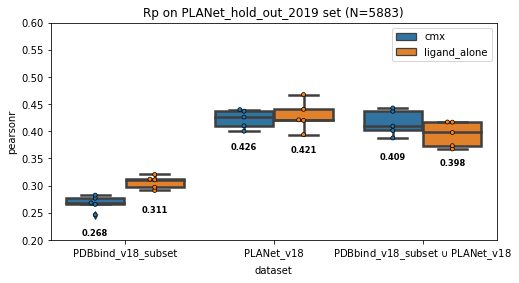

In [41]:
fig, ax= plt.subplots(figsize=(8,4))
sns.boxplot(x="dataset", y=metric, data=sum_df, hue="type", order = models, linewidth=2.5)
sns.swarmplot(x="dataset", y=metric, data=sum_df, hue="type", order = models, size = 4, dodge=True, edgecolor="black", linewidth=0.7)
ax.set_title(f'Rp on PLANet_hold_out_2019 set (N={len(PLANet_hold)})')
# fig.autofmt_xdate()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2])
vertical_offset = sum_df[metric].median() * 0.15 # offset from median for display
for i, modl in enumerate(models):
    for tp in ['cmx', 'ligand_alone']:
        median_metric = round(grouped_median.loc[(grouped_median['model_name'] == f'{modl}_{tp}')][metric].values[0], 3)
        if tp == 'cmx':
            ax.text(i-.2, median_metric-vertical_offset, median_metric, horizontalalignment='center',size='small', weight='semibold')
        else:
            ax.text(i+.2, median_metric-vertical_offset, median_metric, horizontalalignment='center',size='small',weight='semibold')
ax.set_ylim(0.2,0.6)
ax.set_xticklabels(['PDBbind_v18_subset', 'PLANet_v18', 'PDBbind_v18_subset '+r'$\cup{}$' + ' PLANet_v18'])
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/scaled/{metric}_all_5_repeat_models.png', dpi=300, bbox_inches='tight')
# plt.close()

# spearmanr

In [42]:
metric='spearmanr'

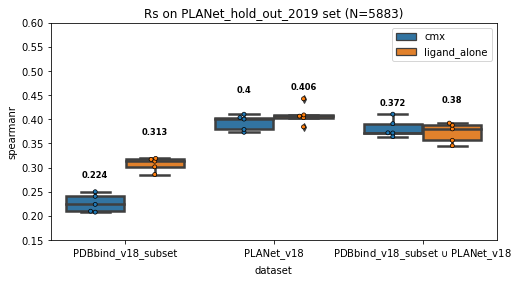

In [44]:
fig, ax= plt.subplots(figsize=(8,4))
sns.boxplot(x="dataset", y=metric, data=sum_df, hue="type", order = models, linewidth=2.5)
sns.swarmplot(x="dataset", y=metric, data=sum_df, hue="type", order = models, size = 4, dodge=True, edgecolor="black", linewidth=0.7)
ax.set_title(f'Rs on PLANet_hold_out_2019 set (N={len(PLANet_hold)})')
# fig.autofmt_xdate()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2])
vertical_offset = sum_df[metric].median() * 0.15 # offset from median for display
for i, modl in enumerate(models):
    for tp in ['cmx', 'ligand_alone']:
        median_metric = round(grouped_median.loc[(grouped_median['model_name'] == f'{modl}_{tp}')][metric].values[0], 3)
        if tp == 'cmx':
            ax.text(i-.2, median_metric+vertical_offset, median_metric, horizontalalignment='center',size='small', weight='semibold')
        else:
            ax.text(i+.2, median_metric+vertical_offset, median_metric, horizontalalignment='center',size='small',weight='semibold')
ax.set_ylim(0.15,0.6)
ax.set_xticklabels(['PDBbind_v18_subset', 'PLANet_v18', 'PDBbind_v18_subset '+r'$\cup{}$' + ' PLANet_v18'])
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/scaled/{metric}_all_5_repeat_models.png', dpi=300, bbox_inches='tight')
# plt.close()

# rmse

In [45]:
metric='rmse'

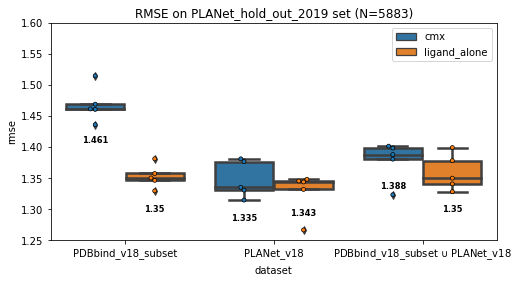

In [46]:
fig, ax= plt.subplots(figsize=(8,4))
sns.boxplot(x="dataset", y=metric, data=sum_df, hue="type", order = models, linewidth=2.5)
sns.swarmplot(x="dataset", y=metric, data=sum_df, hue="type", order = models, size = 4, dodge=True, edgecolor="black", linewidth=0.7)
ax.set_title(f'RMSE on PLANet_hold_out_2019 set (N={len(PLANet_hold)})')
# fig.autofmt_xdate()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2])
vertical_offset = sum_df[metric].median() * 0.04 # offset from median for display
for i, modl in enumerate(models):
    for tp in ['cmx', 'ligand_alone']:
        median_metric = round(grouped_median.loc[(grouped_median['model_name'] == f'{modl}_{tp}')][metric].values[0], 3)
        if tp == 'cmx':
            ax.text(i-.2, median_metric-vertical_offset, median_metric, horizontalalignment='center',size='small', weight='semibold')
        else:
            ax.text(i+.2, median_metric-vertical_offset, median_metric, horizontalalignment='center',size='small',weight='semibold')
ax.set_ylim(1.25,1.6)
ax.set_xticklabels(['PDBbind_v18_subset', 'PLANet_v18', 'PDBbind_v18_subset '+r'$\cup{}$' + ' PLANet_v18'])
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/scaled/{metric}_all_5_repeat_models.png', dpi=300, bbox_inches='tight')
# plt.close()

# mae

In [48]:
max(sum_df['mae'])

1.171658655269283

In [47]:
metric='mae'

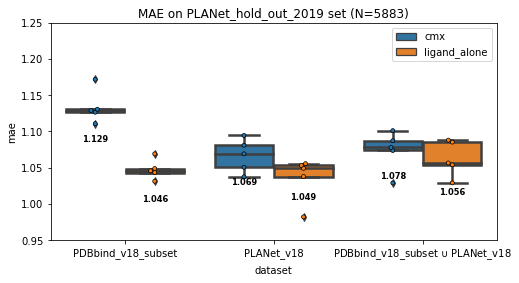

In [50]:
fig, ax= plt.subplots(figsize=(8,4))
sns.boxplot(x="dataset", y=metric, data=sum_df, hue="type", order = models, linewidth=2.5)
sns.swarmplot(x="dataset", y=metric, data=sum_df, hue="type", order = models, size = 4, dodge=True, edgecolor="black", linewidth=0.7)
ax.set_title(f'MAE on PLANet_hold_out_2019 set (N={len(PLANet_hold)})')
# fig.autofmt_xdate()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2])
vertical_offset = sum_df[metric].median() * 0.04 # offset from median for display
for i, modl in enumerate(models):
    for tp in ['cmx', 'ligand_alone']:
        median_metric = round(grouped_median.loc[(grouped_median['model_name'] == f'{modl}_{tp}')][metric].values[0], 3)
        if tp == 'cmx':
            ax.text(i-.2, median_metric-vertical_offset, median_metric, horizontalalignment='center',size='small', weight='semibold')
        else:
            ax.text(i+.2, median_metric-vertical_offset, median_metric, horizontalalignment='center',size='small',weight='semibold')
ax.set_ylim(0.95,1.25)
ax.set_xticklabels(['PDBbind_v18_subset', 'PLANet_v18', 'PDBbind_v18_subset '+r'$\cup{}$' + ' PLANet_v18'])
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/scaled/{metric}_all_5_repeat_models.png', dpi=300, bbox_inches='tight')
# plt.close()

# 2. mean of 5 models

In [52]:
mean_pred_df.to_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/mean_of_5_models/6models.csv', sep='\t', index=False)
mean_pred_df

,unique_identify,y_true,PDBbind_minimized_v18_subset_cmx_mean,PDBbind_minimized_v18_subset_lig_alone_mean,PLANet_v18_cmx_mean,PLANet_v18_lig_alone_mean,PDBbind_minimized_v18_subset_union_PLANet_v18_cmx_mean,PDBbind_minimized_v18_subset_union_PLANet_v18_lig_alone_mean
0,CHEMBL1075159_5vfd_CHEMBL4298137,6.163784,4.282583,7.659022,4.966303,5.095331,5.752660,6.017689
1,CHEMBL1075317_6dar_CHEMBL4276691,5.899630,7.140201,7.217325,6.697965,6.493813,6.961899,6.351235
2,CHEMBL1075317_6dar_CHEMBL4276791,6.732828,6.829639,7.009109,6.592194,6.467938,6.196917,6.594015
3,CHEMBL1075317_6dar_CHEMBL4276998,5.407823,6.450744,6.451485,6.116833,6.324827,5.598868,5.970272
4,CHEMBL1075317_6dar_CHEMBL4277278,5.142065,5.946458,6.234159,5.875279,5.622446,5.444985,5.885864
...,...,...,...,...,...,...,...,...
5843,CHEMBL6154_5nut_CHEMBL4290134,8.060481,6.827743,6.233932,7.540292,7.048703,7.491321,7.303428
5844,CHEMBL6154_5nut_CHEMBL4447252,7.978811,7.175043,6.900517,7.654950,7.778926,7.602954,8.144540
5845,CHEMBL6154_5nut_CHEMBL4455904,7.920819,7.288113,6.959888,7.505557,7.299973,7.891474,8.032762
5846,CHEMBL6154_5nut_CHEMBL4475367,7.886056,7.011175,6.247604,7.385270,7.612063,7.608261,7.768296


In [53]:
res_dict={}
for model in models:
    for tp in tps:
        r2 = r2_score(y_true=mean_pred_df['y_true'], y_pred=mean_pred_df[f'{model}_{tp}_mean'])
        mae = mean_absolute_error(y_true=mean_pred_df['y_true'], y_pred=mean_pred_df[f'{model}_{tp}_mean'])
        mse = mean_squared_error(y_true=mean_pred_df['y_true'], y_pred=mean_pred_df[f'{model}_{tp}_mean'])
        pearsonr = stats.pearsonr(mean_pred_df['y_true'], mean_pred_df[f'{model}_{tp}_mean'])[0]
        spearmanr = stats.spearmanr(mean_pred_df['y_true'], mean_pred_df[f'{model}_{tp}_mean'])[0]
        res_dict[f'{model}_{tp}']=[r2, mae, mse, pearsonr, spearmanr]

com_sum_df = pd.DataFrame.from_dict(res_dict, orient='index', columns=['r2', 'mae', 'mse', 'pearsonr', 'spearmanr']).reset_index()
com_sum_df.rename(columns={"index": "model_names_test_type"}, inplace=True)
com_sum_df['type'] = ['cmx' if 'cmx' in m else 'lig_alone' for m in com_sum_df['model_names_test_type']]
com_sum_df['dataset'] = ['_'.join(m.split('_')[:-1]) if 'cmx' in m else '_'.join(m.split('_')[:-2]) for m in com_sum_df['model_names_test_type']]
com_sum_df.to_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/mean_of_5_models/6models_metric.csv', sep='\t', index=False)
com_sum_df

,model_names_test_type,r2,mae,mse,pearsonr,spearmanr,type,dataset
0,PDBbind_minimized_v18_subset_cmx,-0.105892,1.109499,2.081248,0.279677,0.235258,cmx,PDBbind_minimized_v18_subset
1,PDBbind_minimized_v18_subset_lig_alone,0.044326,1.035854,1.798542,0.314646,0.318503,lig_alone,PDBbind_minimized_v18_subset
2,PLANet_v18_cmx,0.151214,0.999631,1.597385,0.470364,0.436020,cmx,PLANet_v18
3,PLANet_v18_lig_alone,0.223297,0.945418,1.461727,0.500178,0.475067,lig_alone,PLANet_v18
4,PDBbind_minimized_v18_subset_union_PLANet_v18_cmx,0.111724,1.005503,1.671702,0.457741,0.413424,cmx,PDBbind_minimized_v18_subset_union_PLANet_v18
5,PDBbind_minimized_v18_subset_union_PLANet_v18_...,0.185089,0.968342,1.533633,0.467732,0.436147,lig_alone,PDBbind_minimized_v18_subset_union_PLANet_v18


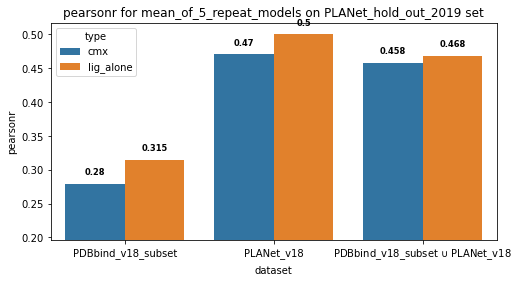

In [54]:
metric='pearsonr'
fig, ax= plt.subplots(figsize=(8,4))
sns.barplot(x="dataset", y=metric, hue='type', data=com_sum_df)

ax.set_title(f'{metric} for mean_of_5_repeat_models on PLANet_hold_out_2019 set')
vertical_offset = com_sum_df[metric].median() * 0.03 # offset from median for display
for i, modl in enumerate(models):
    for tp in ['cmx', 'lig_alone']:
        median_metric = round(com_sum_df.loc[(com_sum_df['model_names_test_type'] == f'{modl}_{tp}')][metric].values[0], 3)
        if tp == 'cmx':
            ax.text(i-.2, median_metric+vertical_offset, median_metric, horizontalalignment='center',size='small', weight='semibold')
        else:
            ax.text(i+.2, median_metric+vertical_offset, median_metric, horizontalalignment='center',size='small',weight='semibold')
ax.set_ylim(min(sum_df[metric])-0.05, min(max(sum_df[metric])+0.05, 1))
ax.set_xticklabels(['PDBbind_v18_subset', 'PLANet_v18', 'PDBbind_v18_subset '+r'$\cup{}$' + ' PLANet_v18'])
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/mean_of_5_models/{metric}_mean_of_5_repeat_models.png', dpi=300, bbox_inches='tight')
# plt.close()

# 散点图

In [55]:
from scipy.stats import gaussian_kde

In [56]:
simple_dict = {'PDBbind_minimized_v18_subset':'PDBbind_v18_subset', 'PDBbind_minimized_v18_subset_union_PLANet_v18':'PDBbind_v18_subset '+r'$\cup{}$' + ' PLANet_v18','PLANet_v18':'PLANet_v18'}

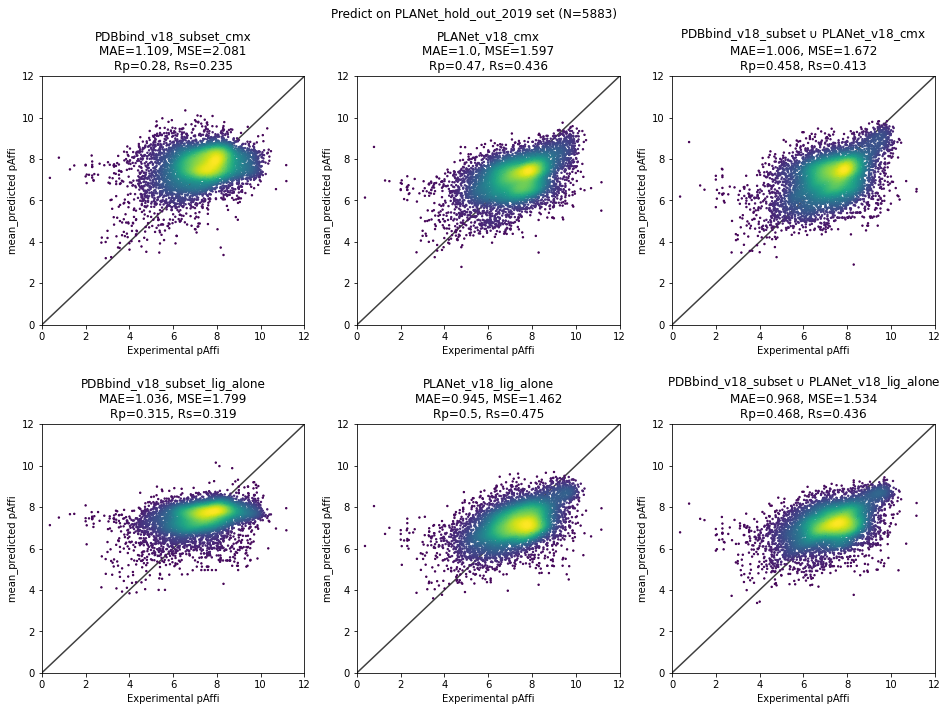

In [58]:
fig = plt.figure(figsize=(16,16))
for i, model in enumerate(models):
    for j, tp in enumerate(tps):
        # print((i+1)+6*j)
        ax = fig.add_subplot(3, 3, (i+1)+3*j)
        # fig, ax = plt.subplots(figsize=(6,6))
        y_true = mean_pred_df['y_true']
        y_pred = mean_pred_df[f'{model}_{tp}_mean']

        xy = np.vstack([y_true.T, y_pred.T])
        z = gaussian_kde(xy)(xy)

        # Sort the points by density, so that the densest points are plotted last
        idx = z.argsort()
        y_true_, y_pred_, z = y_true[idx], y_pred[idx], z[idx]

        #https://github.com/hnlab/handbook/blob/41ad374cd0f9dc3ef882a7724eaac3d1f748fc05/0-General-computing-skills/MISC/vsfig.py#L83-L134
        # fig, ax = plt.subplots()
        ax.scatter(y_true_, y_pred_, s=2, c=z, zorder=2)

        # sns.scatterplot(x='y_true', y=f'{model}_{tp}_mean', data=mean_pred_df)
        lims = [0,12]
        ax.set_xlim(lims)
        ax.set_ylim(lims)
        ax.plot(lims, lims, "k-", alpha=0.75, zorder=0)
        ax.set_ylabel(f'mean_predicted pAffi')
        ax.set_xlabel('Experimental pAffi')
        ax.set_title(f'{simple_dict[model]}_{tp}\nMAE={round(com_sum_df[com_sum_df["model_names_test_type"]==f"{model}_{tp}"]["mae"].values[0], 3)}, MSE={round(com_sum_df[com_sum_df["model_names_test_type"]==f"{model}_{tp}"]["mse"].values[0], 3)}\nRp={round(com_sum_df[com_sum_df["model_names_test_type"]==f"{model}_{tp}"]["pearsonr"].values[0], 3)}, Rs={round(com_sum_df[com_sum_df["model_names_test_type"]==f"{model}_{tp}"]["spearmanr"].values[0], 3)}')
# plt.subplots_adjust(left=0.125,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.87, 
#                     wspace=1, 
#                     hspace=0.8)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.92, 
                    wspace=0.2, 
                    hspace=0.4)
plt.suptitle(f'Predict on PLANet_hold_out_2019 set (N={len(PLANet_hold)})')
plt.savefig('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/mean_of_5_models/scatter_6_models.png', dpi=300, bbox_inches='tight')

# PDBbind_v18_subset vs PLANet_v18

In [172]:
mean_pred_df['d(PLANet_cmx-PDBbind_cmx)']=np.abs(mean_pred_df['PLANet_v18_cmx_mean']-mean_pred_df['PDBbind_minimized_v18_subset_cmx_mean'])
mean_pred_df.sort_values(by='d(PLANet_cmx-PDBbind_cmx)',ascending=False)

,unique_identify,y_true,PDBbind_minimized_v18_subset_cmx_mean,PDBbind_minimized_v18_subset_lig_alone_mean,PLANet_v18_cmx_mean,PLANet_v18_lig_alone_mean,PDBbind_minimized_v18_subset_union_PLANet_v18_cmx_mean,PDBbind_minimized_v18_subset_union_PLANet_v18_lig_alone_mean,d(PLANet_cmx-PDBbind_cmx)
2162,CHEMBL251_5wf6_CHEMBL2064661,5.507240,9.965992,8.770558,5.840870,6.095154,6.291188,6.810824,4.125121
2153,CHEMBL251_5wf5_CHEMBL602846,5.787812,9.795744,8.258307,5.756735,6.842829,5.930214,6.127099,4.039009
4382,CHEMBL4295910_5zfi_CHEMBL4129267,5.420217,8.668939,7.807594,4.682509,6.196663,5.742752,6.469882,3.986430
4383,CHEMBL4295910_5zfi_CHEMBL4130155,5.113509,8.474088,7.920055,4.641868,6.508163,5.845872,6.607052,3.832219
2152,CHEMBL251_5wf5_CHEMBL602845,5.241088,9.817773,8.571429,6.054189,6.853437,5.672919,6.094262,3.763584
...,...,...,...,...,...,...,...,...,...
3415,CHEMBL3514_5yea_CHEMBL4070470,7.638272,7.732751,7.429411,7.733985,7.169871,7.953786,7.439620,0.001234
646,CHEMBL2010636_5g57_CHEMBL4452707,6.980012,8.135374,7.923720,8.134274,7.238260,8.007784,6.350607,0.001100
2590,CHEMBL2835_6aah_CHEMBL3593762,6.522879,7.553646,6.782543,7.554092,7.587115,7.186619,7.858694,0.000446
3518,CHEMBL3744_6f29_CHEMBL1812596,5.990549,6.113662,6.360703,6.113998,5.078992,7.055004,6.433722,0.000336


In [173]:
PLANet_vs_PDBbind_dlarge2_cmx = mean_pred_df[np.abs(mean_pred_df['d(PLANet_cmx-PDBbind_cmx)'])>2].copy()
len(PLANet_vs_PDBbind_dlarge2_cmx)

302

In [174]:
PLANet_hold_property_Pfam.columns

Index(['index', 'unique_identify', '-logAffi', 'Target_chembl_id',
       'Cry_lig_name', 'Cry_lig_smiles', 'Cry_lig_an', 'Similar_compnd_name',
       'Similar_compnd_smiles', 'Similar_compnd_an', 'Similarity', 'Core_num',
       'Diff_an', 'Part_fix', 'Total_sampled_num', 'Similar_compnd_conform',
       'Total_delta', 'Lig_delta', 'Core_RMSD', 'MolWt', 'MCS_smarts',
       'target_compnd', 'mw', 'logp', 'rotb', 'hbd', 'hba', 'q', 'HA',
       'dataset', 'PCV_cluster'],
      dtype='object')

In [188]:
len(PLANet_hold_property_Pfam)

5883

In [175]:
# len(PLANet_vs_PDBbind_dlarge2_cmx.round({'y_true': 2}).merge(PLANet_hold_property_Pfam[['unique_identify', 'PCV_cluster']], on=['unique_identify']))

302

In [179]:
PLANet_vs_PDBbind_dlarge2_cmx_prop = PLANet_vs_PDBbind_dlarge2_cmx.round({'y_true': 2}).merge(PLANet_hold_property_Pfam[['unique_identify', 'mw', 'logp', 'rotb', 'hbd', 'hba', 'q', 'HA', 'PCV_cluster']], on=['unique_identify'])
PLANet_vs_PDBbind_dlarge2_cmx_prop

,unique_identify,y_true,PDBbind_minimized_v18_subset_cmx_mean,PDBbind_minimized_v18_subset_lig_alone_mean,PLANet_v18_cmx_mean,PLANet_v18_lig_alone_mean,PDBbind_minimized_v18_subset_union_PLANet_v18_cmx_mean,PDBbind_minimized_v18_subset_union_PLANet_v18_lig_alone_mean,d(PLANet_cmx-PDBbind_cmx),mw,logp,rotb,hbd,hba,q,HA,PCV_cluster
0,CHEMBL1163125_6boy_CHEMBL4558228,6.25,8.378729,8.482279,6.159380,6.965242,5.912561,7.250418,2.219349,516.494,7.23594,3.0,0.0,6.0,0.0,34.0,Bromodomain
1,CHEMBL1741186_6b31_CHEMBL4226373,8.45,8.741947,7.487006,6.048946,7.176769,6.982967,6.843365,2.693000,522.005,4.11168,9.0,2.0,7.0,0.0,37.0,hormone_recep
2,CHEMBL1795116_6ckc_CHEMBL4524391,7.37,7.814514,6.726834,5.193650,6.886167,6.458435,6.987555,2.620863,390.488,-2.59260,3.0,5.0,7.0,2.0,28.0,NADP_Rossmann
3,CHEMBL1795116_6ckc_CHEMBL4588797,5.62,6.994226,6.637861,4.509521,7.049857,5.220601,7.552073,2.484705,408.440,-3.01192,7.0,4.0,11.0,0.0,28.0,NADP_Rossmann
4,CHEMBL1795176_5th7_CHEMBL3318286,4.17,8.336860,7.042220,5.421099,5.701714,6.747791,6.105808,2.915761,372.493,1.33780,7.0,2.0,6.0,1.0,27.0,SET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,CHEMBL5408_6cq4_CHEMBL4287847,5.16,6.770550,6.927397,4.639090,6.383699,5.175042,7.191710,2.131460,298.278,0.80530,2.0,1.0,7.0,-1.0,22.0,pkinase
298,CHEMBL6031_5ttg_CHEMBL4062510,6.09,7.135936,7.130796,5.133836,5.793036,5.499321,6.278781,2.002100,372.493,0.87242,4.0,2.0,6.0,1.0,27.0,SET
299,CHEMBL6031_5ttg_CHEMBL4090494,5.91,7.246441,7.287561,4.904957,6.122292,5.386288,6.352893,2.341484,376.456,0.70310,4.0,2.0,6.0,1.0,27.0,SET
300,CHEMBL6031_5ttg_CHEMBL4441913,4.99,7.474132,7.363671,5.440502,6.403299,5.979924,6.319334,2.033630,463.630,0.51420,5.0,3.0,6.0,2.0,34.0,SET


In [183]:
len(PLANet_vs_PDBbind_dlarge2_cmx_prop[np.abs(PLANet_vs_PDBbind_dlarge2_cmx_prop['PDBbind_minimized_v18_subset_cmx_mean']-PLANet_vs_PDBbind_dlarge2_cmx_prop['y_true']) > np.abs(PLANet_vs_PDBbind_dlarge2_cmx_prop['PLANet_v18_cmx_mean']-PLANet_vs_PDBbind_dlarge2_cmx_prop['y_true'])].sort_values(by='d(PLANet_cmx-PDBbind_cmx)', ascending=False))

192

In [184]:
PLANet_vs_PDBbind_dlarge2_cmx_prop[np.abs(PLANet_vs_PDBbind_dlarge2_cmx_prop['PDBbind_minimized_v18_subset_cmx_mean']-PLANet_vs_PDBbind_dlarge2_cmx_prop['y_true']) > np.abs(PLANet_vs_PDBbind_dlarge2_cmx_prop['PLANet_v18_cmx_mean']-PLANet_vs_PDBbind_dlarge2_cmx_prop['y_true'])].sort_values(by='d(PLANet_cmx-PDBbind_cmx)', ascending=False).head(10)

,unique_identify,y_true,PDBbind_minimized_v18_subset_cmx_mean,PDBbind_minimized_v18_subset_lig_alone_mean,PLANet_v18_cmx_mean,PLANet_v18_lig_alone_mean,PDBbind_minimized_v18_subset_union_PLANet_v18_cmx_mean,PDBbind_minimized_v18_subset_union_PLANet_v18_lig_alone_mean,d(PLANet_cmx-PDBbind_cmx),mw,logp,rotb,hbd,hba,q,HA,PCV_cluster
137,CHEMBL251_5wf6_CHEMBL2064661,5.51,9.965992,8.770558,5.840870,6.095154,6.291188,6.810824,4.125121,653.142,5.41780,5.0,4.0,8.0,0.0,48.0,GPCR_A
129,CHEMBL251_5wf5_CHEMBL602846,5.79,9.795744,8.258307,5.756735,6.842829,5.930214,6.127099,4.039009,648.192,1.49870,13.0,5.0,11.0,1.0,46.0,GPCR_A
242,CHEMBL4295910_5zfi_CHEMBL4129267,5.42,8.668939,7.807594,4.682509,6.196663,5.742752,6.469882,3.986430,501.635,2.80824,7.0,2.0,6.0,0.0,37.0,Peptidase_PA
243,CHEMBL4295910_5zfi_CHEMBL4130155,5.11,8.474088,7.920055,4.641868,6.508163,5.845872,6.607052,3.832219,505.598,2.63892,7.0,2.0,6.0,0.0,37.0,Peptidase_PA
128,CHEMBL251_5wf5_CHEMBL602845,5.24,9.817773,8.571429,6.054189,6.853437,5.672919,6.094262,3.763584,773.092,4.25300,12.0,4.0,12.0,0.0,51.0,GPCR_A
127,CHEMBL251_5wf5_CHEMBL602843,5.26,9.621541,8.987935,6.033455,6.490025,5.578665,6.011121,3.588085,667.174,3.04800,10.0,5.0,12.0,0.0,48.0,GPCR_A
95,CHEMBL251_5wf5_CHEMBL184557,5.40,9.493888,7.494983,5.998732,5.818150,6.072060,6.350332,3.495156,514.930,0.24860,7.0,5.0,12.0,0.0,36.0,GPCR_A
121,CHEMBL251_5wf5_CHEMBL4102630,5.17,9.163149,8.137859,5.674339,5.584998,5.511005,5.745957,3.488810,473.896,2.49514,5.0,3.0,10.0,0.0,33.0,GPCR_A
167,CHEMBL251_6gdg_CHEMBL132629,7.19,9.192622,6.434173,5.752719,5.037378,5.917148,5.526923,3.439903,483.290,-0.09590,5.0,4.0,8.0,1.0,27.0,GPCR_A
143,CHEMBL251_5wf6_CHEMBL254896,4.80,8.772926,5.454131,5.341756,5.847502,6.079760,5.198971,3.431171,458.928,0.21070,5.0,4.0,11.0,0.0,30.0,GPCR_A


In [185]:
PLANet_vs_PDBbind_dlarge2_cmx_prop[np.abs(PLANet_vs_PDBbind_dlarge2_cmx_prop['PDBbind_minimized_v18_subset_cmx_mean']-PLANet_vs_PDBbind_dlarge2_cmx_prop['y_true']) > np.abs(PLANet_vs_PDBbind_dlarge2_cmx_prop['PLANet_v18_cmx_mean']-PLANet_vs_PDBbind_dlarge2_cmx_prop['y_true'])].groupby('PCV_cluster').size()

PCV_cluster
AB_hydrolase        1
BCLiA               5
Beta-tent           1
Bromodomain         2
C2                  1
Calycin             5
Carb_anhydrase      2
GPCR_A            106
Iso_DH              1
LDH_C               1
NADP_Rossmann       6
Neur_chan_LBD      11
P53-like            3
PLA2                1
Peptidase_CA        4
Peptidase_CD        1
Peptidase_MA        4
Peptidase_PA       14
Phosphatase         1
SET                17
pkinase             5
dtype: int64

In [181]:
len(PLANet_vs_PDBbind_dlarge2_cmx[np.abs(PLANet_vs_PDBbind_dlarge2_cmx['PDBbind_minimized_v18_subset_cmx_mean']-PLANet_vs_PDBbind_dlarge2_cmx['y_true']) < np.abs(PLANet_vs_PDBbind_dlarge2_cmx['PLANet_v18_cmx_mean']-PLANet_vs_PDBbind_dlarge2_cmx['y_true'])].sort_values(by='d(PLANet_cmx-PDBbind_cmx)', ascending=False))

110

In [186]:
PLANet_rmse = np.sqrt(mean_squared_error(y_true=mean_pred_df['y_true'], y_pred=mean_pred_df['PLANet_v18_cmx_mean']))
PLANet_pearsonr = stats.pearsonr(mean_pred_df['y_true'], mean_pred_df['PLANet_v18_cmx_mean'])
PLANet_mae = mean_absolute_error(y_true=mean_pred_df['y_true'], y_pred=mean_pred_df['PLANet_v18_cmx_mean'])
PLANet_spearmanr = stats.spearmanr(mean_pred_df['y_true'], mean_pred_df['PLANet_v18_cmx_mean'])


PIP_rmse = np.sqrt(mean_squared_error(y_true=mean_pred_df['y_true'], y_pred=mean_pred_df['PDBbind_minimized_v18_subset_cmx_mean']))
PIP_pearsonr = stats.pearsonr(mean_pred_df['y_true'], mean_pred_df['PDBbind_minimized_v18_subset_cmx_mean'])
PIP_mae = mean_absolute_error(y_true=mean_pred_df['y_true'], y_pred=mean_pred_df['PDBbind_minimized_v18_subset_cmx_mean'])
PIP_spearmanr = stats.spearmanr(mean_pred_df['y_true'], mean_pred_df['PDBbind_minimized_v18_subset_cmx_mean'])
print(f'PLANet Rp:{PLANet_pearsonr[0]}, MAE:{PLANet_mae}, Rs:{PLANet_spearmanr[0]}, RMSE:{PLANet_rmse}')
print(f'PIP Rp:{PIP_pearsonr[0]}, MAE:{PIP_mae}, Rs:{PIP_spearmanr[0]}, RMSE:{PIP_rmse}')

PLANet Rp:0.4703643721445863, MAE:0.9996311005077512, Rs:0.4360203886369222, RMSE:1.2638767941994895
PIP Rp:0.2796774309904661, MAE:1.1094988252065576, Rs:0.23525764682609776, RMSE:1.4426531562324612


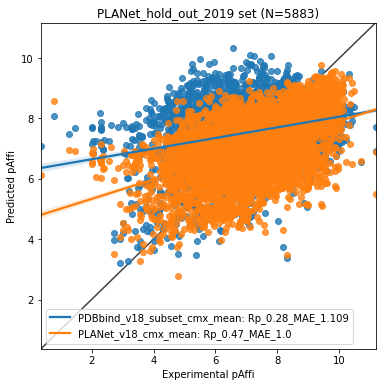

In [189]:
fig, ax = plt.subplots(figsize=(6,6))
sns.regplot(data=mean_pred_df, x="y_true", y="PDBbind_minimized_v18_subset_cmx_mean")
sns.regplot(data=mean_pred_df, x="y_true", y="PLANet_v18_cmx_mean")
# sns.regplot(data=delta_df, x="y_true", y="PLANet_cmx_mean", marker="o", facecolor="none", edgecolor='black', linewidth=2)
# sns.scatterplot(data=delta_df, x="y_true", y="PIP_cmx_mean", marker="o", facecolor="none", edgecolor='dimgrey', linewidth=2)
lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.plot(lims, lims, "k-", alpha=0.75, zorder=0)
plt.xlabel("Experimental pAffi")
plt.ylabel("Predicted pAffi")
plt.title(f'PLANet_hold_out_2019 set (N={len(PLANet_hold_property_Pfam)})')
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[:2], labels[:2], loc='upper left')
plt.legend(labels=[f"PDBbind_v18_subset_cmx_mean: Rp_{round(PIP_pearsonr[0],3)}_MAE_{round(PIP_mae,3)}", f"PLANet_v18_cmx_mean: Rp_{round(PLANet_pearsonr[0],3)}_MAE_{round(PLANet_mae,3)}"])
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/mean_of_5_models/PLANet_vs_PIP_cmx_mean_MAE_regplot.png', dpi=300, bbox_inches='tight')

In [190]:
mean_pred_df.columns

Index(['unique_identify', 'y_true', 'PDBbind_minimized_v18_subset_cmx_mean',
       'PDBbind_minimized_v18_subset_lig_alone_mean', 'PLANet_v18_cmx_mean',
       'PLANet_v18_lig_alone_mean',
       'PDBbind_minimized_v18_subset_union_PLANet_v18_cmx_mean',
       'PDBbind_minimized_v18_subset_union_PLANet_v18_lig_alone_mean',
       'd(PLANet_cmx-PDBbind_cmx)'],
      dtype='object')

In [191]:
mean_pred_df_melted = mean_pred_df.melt(id_vars=['unique_identify', 'y_true'], var_name='model')

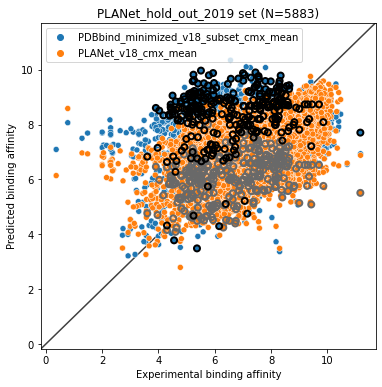

In [194]:
PIP_PLANet_cmx = mean_pred_df_melted[mean_pred_df_melted['model'].isin(['PDBbind_minimized_v18_subset_cmx_mean', 'PLANet_v18_cmx_mean'])].copy()

fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=PIP_PLANet_cmx, x="y_true", y="value", hue='model')

sns.scatterplot(data=PLANet_vs_PDBbind_dlarge2_cmx, x="y_true", y="PLANet_v18_cmx_mean", marker="o", facecolor="none", edgecolor='dimgrey', linewidth=2)
sns.scatterplot(data=PLANet_vs_PDBbind_dlarge2_cmx, x="y_true", y="PDBbind_minimized_v18_subset_cmx_mean", marker="o", facecolor="none", edgecolor='black', linewidth=2)

lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.plot(lims, lims, "k-", alpha=0.75, zorder=0)
plt.xlabel("Experimental binding affinity")
plt.ylabel("Predicted binding affinity")
plt.title(f'PLANet_hold_out_2019 set (N={len(PLANet_hold_property_Pfam)})')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper left')
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/mean_of_5_models/PLANet_vs_PIP_cmx_2_circled.png', dpi=300, bbox_inches='tight')

# d > 3

In [196]:
PLANet_vs_PDBbind_dlarge3_cmx = mean_pred_df[np.abs(mean_pred_df['d(PLANet_cmx-PDBbind_cmx)'])>3].copy()
len(PLANet_vs_PDBbind_dlarge3_cmx)

29

In [198]:
PLANet_vs_PDBbind_dlarge3_cmx_prop = PLANet_vs_PDBbind_dlarge3_cmx.round({'y_true': 2}).merge(PLANet_hold_property_Pfam[['unique_identify', 'mw', 'logp', 'rotb', 'hbd', 'hba', 'q', 'HA', 'PCV_cluster']], on=['unique_identify'])
len(PLANet_vs_PDBbind_dlarge3_cmx_prop)

29

In [199]:
len(PLANet_vs_PDBbind_dlarge3_cmx_prop[np.abs(PLANet_vs_PDBbind_dlarge3_cmx_prop['PDBbind_minimized_v18_subset_cmx_mean']-PLANet_vs_PDBbind_dlarge3_cmx_prop['y_true']) > np.abs(PLANet_vs_PDBbind_dlarge3_cmx_prop['PLANet_v18_cmx_mean']-PLANet_vs_PDBbind_dlarge3_cmx_prop['y_true'])].sort_values(by='d(PLANet_cmx-PDBbind_cmx)', ascending=False))

28

In [200]:
PLANet_vs_PDBbind_dlarge3_cmx_prop[np.abs(PLANet_vs_PDBbind_dlarge3_cmx_prop['PDBbind_minimized_v18_subset_cmx_mean']-PLANet_vs_PDBbind_dlarge3_cmx_prop['y_true']) > np.abs(PLANet_vs_PDBbind_dlarge3_cmx_prop['PLANet_v18_cmx_mean']-PLANet_vs_PDBbind_dlarge3_cmx_prop['y_true'])].sort_values(by='d(PLANet_cmx-PDBbind_cmx)', ascending=False)

,unique_identify,y_true,PDBbind_minimized_v18_subset_cmx_mean,PDBbind_minimized_v18_subset_lig_alone_mean,PLANet_v18_cmx_mean,PLANet_v18_lig_alone_mean,PDBbind_minimized_v18_subset_union_PLANet_v18_cmx_mean,PDBbind_minimized_v18_subset_union_PLANet_v18_lig_alone_mean,d(PLANet_cmx-PDBbind_cmx),mw,logp,rotb,hbd,hba,q,HA,PCV_cluster
11,CHEMBL251_5wf6_CHEMBL2064661,5.51,9.965992,8.770558,5.840870,6.095154,6.291188,6.810824,4.125121,653.142,5.41780,5.0,4.0,8.0,0.0,48.0,GPCR_A
8,CHEMBL251_5wf5_CHEMBL602846,5.79,9.795744,8.258307,5.756735,6.842829,5.930214,6.127099,4.039009,648.192,1.49870,13.0,5.0,11.0,1.0,46.0,GPCR_A
27,CHEMBL4295910_5zfi_CHEMBL4129267,5.42,8.668939,7.807594,4.682509,6.196663,5.742752,6.469882,3.986430,501.635,2.80824,7.0,2.0,6.0,0.0,37.0,Peptidase_PA
28,CHEMBL4295910_5zfi_CHEMBL4130155,5.11,8.474088,7.920055,4.641868,6.508163,5.845872,6.607052,3.832219,505.598,2.63892,7.0,2.0,6.0,0.0,37.0,Peptidase_PA
7,CHEMBL251_5wf5_CHEMBL602845,5.24,9.817773,8.571429,6.054189,6.853437,5.672919,6.094262,3.763584,773.092,4.25300,12.0,4.0,12.0,0.0,51.0,GPCR_A
6,CHEMBL251_5wf5_CHEMBL602843,5.26,9.621541,8.987935,6.033455,6.490025,5.578665,6.011121,3.588085,667.174,3.04800,10.0,5.0,12.0,0.0,48.0,GPCR_A
1,CHEMBL251_5wf5_CHEMBL184557,5.40,9.493888,7.494983,5.998732,5.818150,6.072060,6.350332,3.495156,514.930,0.24860,7.0,5.0,12.0,0.0,36.0,GPCR_A
3,CHEMBL251_5wf5_CHEMBL4102630,5.17,9.163149,8.137859,5.674339,5.584998,5.511005,5.745957,3.488810,473.896,2.49514,5.0,3.0,10.0,0.0,33.0,GPCR_A
19,CHEMBL251_6gdg_CHEMBL132629,7.19,9.192622,6.434173,5.752719,5.037378,5.917148,5.526923,3.439903,483.290,-0.09590,5.0,4.0,8.0,1.0,27.0,GPCR_A
13,CHEMBL251_5wf6_CHEMBL254896,4.80,8.772926,5.454131,5.341756,5.847502,6.079760,5.198971,3.431171,458.928,0.21070,5.0,4.0,11.0,0.0,30.0,GPCR_A


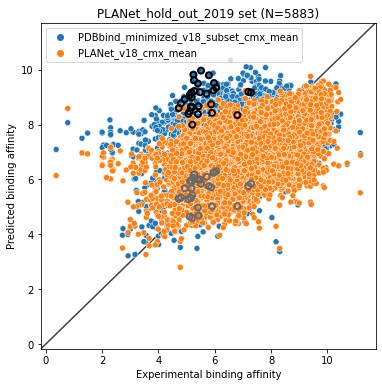

In [201]:
PIP_PLANet_cmx = mean_pred_df_melted[mean_pred_df_melted['model'].isin(['PDBbind_minimized_v18_subset_cmx_mean', 'PLANet_v18_cmx_mean'])].copy()

fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=PIP_PLANet_cmx, x="y_true", y="value", hue='model')

sns.scatterplot(data=PLANet_vs_PDBbind_dlarge3_cmx_prop, x="y_true", y="PLANet_v18_cmx_mean", marker="o", facecolor="none", edgecolor='dimgrey', linewidth=2)
sns.scatterplot(data=PLANet_vs_PDBbind_dlarge3_cmx_prop, x="y_true", y="PDBbind_minimized_v18_subset_cmx_mean", marker="o", facecolor="none", edgecolor='black', linewidth=2)

lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.plot(lims, lims, "k-", alpha=0.75, zorder=0)
plt.xlabel("Experimental binding affinity")
plt.ylabel("Predicted binding affinity")
plt.title(f'PLANet_hold_out_2019 set (N={len(PLANet_hold_property_Pfam)})')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper left')
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/mean_of_5_models/PLANet_vs_PIP_cmx_3_circled.png', dpi=300, bbox_inches='tight')

# Mw-predicted_pAffi

In [61]:
PLANet_hold_property.columns

Index(['unique_identify', '-logAffi', 'Target_chembl_id', 'Cry_lig_name',
       'Cry_lig_smiles', 'Cry_lig_an', 'Similar_compnd_name',
       'Similar_compnd_smiles', 'Similar_compnd_an', 'Similarity', 'Core_num',
       'Diff_an', 'Part_fix', 'Total_sampled_num', 'Similar_compnd_conform',
       'Total_delta', 'Lig_delta', 'Core_RMSD', 'MolWt', 'MCS_smarts',
       'target_compnd', 'mw', 'logp', 'rotb', 'hbd', 'hba', 'q', 'HA',
       'dataset'],
      dtype='object')

In [62]:
mean_pred_df.columns

Index(['unique_identify', 'y_true', 'PDBbind_minimized_v18_subset_cmx_mean',
       'PDBbind_minimized_v18_subset_lig_alone_mean', 'PLANet_v18_cmx_mean',
       'PLANet_v18_lig_alone_mean',
       'PDBbind_minimized_v18_subset_union_PLANet_v18_cmx_mean',
       'PDBbind_minimized_v18_subset_union_PLANet_v18_lig_alone_mean'],
      dtype='object')

In [66]:
len(mean_pred_df)

5848

In [65]:
mean_pred_df_with_prop = pd.merge(mean_pred_df.round({'y_true': 2}), PLANet_hold_property.rename(columns={'-logAffi':'y_true'}).round({'y_true': 2}), on=['unique_identify', 'y_true'])
mean_pred_df_with_prop

,unique_identify,y_true,PDBbind_minimized_v18_subset_cmx_mean,PDBbind_minimized_v18_subset_lig_alone_mean,PLANet_v18_cmx_mean,PLANet_v18_lig_alone_mean,PDBbind_minimized_v18_subset_union_PLANet_v18_cmx_mean,PDBbind_minimized_v18_subset_union_PLANet_v18_lig_alone_mean,Target_chembl_id,Cry_lig_name,...,MCS_smarts,target_compnd,mw,logp,rotb,hbd,hba,q,HA,dataset
0,CHEMBL1075159_5vfd_CHEMBL4298137,6.16,4.282583,7.659022,4.966303,5.095331,5.752660,6.017689,CHEMBL1075159,5vfd,...,[#6]1=&@[#6]-&@[#6](-&!@[#6](=&!@[#8])-&!@[#7]...,CHEMBL1075159_CHEMBL4298137,276.250,-1.7018,3.0,1.0,6.0,-1.0,18.0,PLANet
1,CHEMBL1075317_6dar_CHEMBL4276691,5.90,7.140201,7.217325,6.697965,6.493813,6.961899,6.351235,CHEMBL1075317,6dar,...,[#8]=&!@[#6](-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@...,CHEMBL1075317_CHEMBL4276691,415.537,4.9474,7.0,0.0,4.0,0.0,31.0,PLANet
2,CHEMBL1075317_6dar_CHEMBL4276791,6.73,6.829639,7.009109,6.592194,6.467938,6.196917,6.594015,CHEMBL1075317,6dar,...,[#6]-&!@[#8]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[...,CHEMBL1075317_CHEMBL4276791,390.487,3.5009,6.0,1.0,5.0,0.0,29.0,PLANet
3,CHEMBL1075317_6dar_CHEMBL4276998,5.41,6.450744,6.451485,6.116833,6.324827,5.598868,5.970272,CHEMBL1075317,6dar,...,[#8]=&!@[#6](-&!@[#7]-&!@[#6]-&!@[#6]1:&@[#6]:...,CHEMBL1075317_CHEMBL4276998,318.380,2.8213,4.0,1.0,4.0,0.0,24.0,PLANet
4,CHEMBL1075317_6dar_CHEMBL4277278,5.14,5.946458,6.234159,5.875279,5.622446,5.444985,5.885864,CHEMBL1075317,6dar,...,[#8]=&!@[#6](-&!@[#7]-&!@[#6]-&!@[#6]1:&@[#6]:...,CHEMBL1075317_CHEMBL4277278,317.392,3.4263,4.0,1.0,3.0,0.0,24.0,PLANet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,CHEMBL6154_5nut_CHEMBL4290134,8.06,6.827743,6.233932,7.540292,7.048703,7.491321,7.303428,CHEMBL6154,5nut,...,[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)...,CHEMBL6154_CHEMBL4290134,278.355,3.8876,1.0,1.0,2.0,0.0,21.0,PLANet
5844,CHEMBL6154_5nut_CHEMBL4447252,7.98,7.175043,6.900517,7.654950,7.778926,7.602954,8.144540,CHEMBL6154,5nut,...,[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)...,CHEMBL6154_CHEMBL4447252,298.317,2.9566,2.0,2.0,3.0,0.0,22.0,PLANet
5845,CHEMBL6154_5nut_CHEMBL4455904,7.92,7.288113,6.959888,7.505557,7.299973,7.891474,8.032762,CHEMBL6154,5nut,...,[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)...,CHEMBL6154_CHEMBL4455904,339.394,1.0639,2.0,2.0,3.0,1.0,25.0,PLANet
5846,CHEMBL6154_5nut_CHEMBL4475367,7.89,7.011175,6.247604,7.385270,7.612063,7.608261,7.768296,CHEMBL6154,5nut,...,[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)...,CHEMBL6154_CHEMBL4475367,280.327,2.8175,2.0,2.0,3.0,0.0,21.0,PLANet


In [72]:
max(mean_pred_df_with_prop['mw'])

866.4509999999989

In [73]:
min(mean_pred_df_with_prop['mw'])

99.089

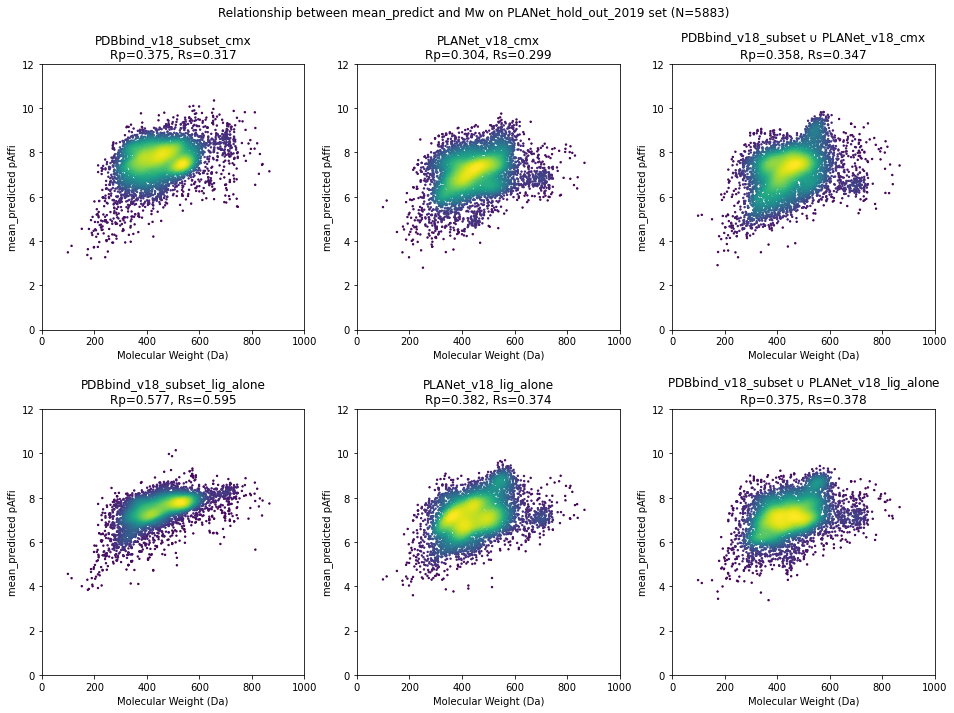

In [100]:
fig = plt.figure(figsize=(16,16))
for i, model in enumerate(models):
    for j, tp in enumerate(tps):
        # print((i+1)+6*j)
        ax = fig.add_subplot(3, 3, (i+1)+3*j)
        # fig, ax = plt.subplots(figsize=(6,6))

        y_true = mean_pred_df_with_prop['mw']
        y_pred = mean_pred_df_with_prop[f'{model}_{tp}_mean']

        xy = np.vstack([y_true.T, y_pred.T])
        z = gaussian_kde(xy)(xy)

        # Sort the points by density, so that the densest points are plotted last
        idx = z.argsort()
        y_true_, y_pred_, z = y_true[idx], y_pred[idx], z[idx]

        #https://github.com/hnlab/handbook/blob/41ad374cd0f9dc3ef882a7724eaac3d1f748fc05/0-General-computing-skills/MISC/vsfig.py#L83-L134
        # fig, ax = plt.subplots()
        ax.scatter(y_true_, y_pred_, s=2, c=z, zorder=2)

        # sns.scatterplot(x='mw', y=f'{model}_{tp}_mean', data=mean_pred_df_with_prop)

        # if model=='PDBbind_minimized_intersected_Uw':
        #     ax.axvline(x=800, color='black', linestyle='--')

        ax.set_xlim(0, 1000)
        ax.set_ylim(0, 12)

        ax.set_ylabel(f'mean_predicted pAffi')
        ax.set_xlabel('Molecular Weight (Da)')
        ax.set_title(f'{simple_dict[model]}_{tp}\nRp={round(stats.pearsonr(mean_pred_df_with_prop[f"{model}_{tp}_mean"], mean_pred_df_with_prop["mw"])[0], 3)}, Rs={round(stats.spearmanr(mean_pred_df_with_prop[f"{model}_{tp}_mean"], mean_pred_df_with_prop["mw"])[0], 3)}')
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.93, 
                    wspace=0.2, 
                    hspace=0.3)
plt.suptitle(f'Relationship between mean_predict and Mw on PLANet_hold_out_2019 set (N={len(PLANet_hold_property)})')
plt.savefig('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/mean_of_5_models/mw/scatter_for_12_models.png', dpi=300, bbox_inches='tight')

# HA

In [202]:
max(mean_pred_df_with_prop['HA'])

60.0

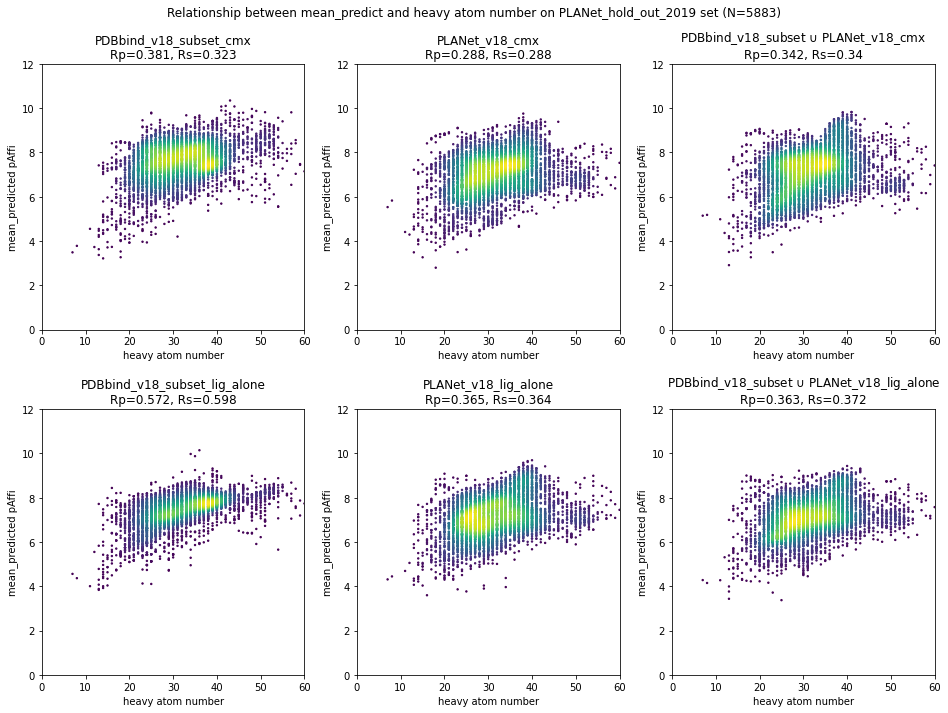

In [203]:
fig = plt.figure(figsize=(16,16))
for i, model in enumerate(models):
    for j, tp in enumerate(tps):
        # print((i+1)+6*j)
        ax = fig.add_subplot(3, 3, (i+1)+3*j)
        # fig, ax = plt.subplots(figsize=(6,6))

        y_true = mean_pred_df_with_prop['HA']
        y_pred = mean_pred_df_with_prop[f'{model}_{tp}_mean']

        xy = np.vstack([y_true.T, y_pred.T])
        z = gaussian_kde(xy)(xy)

        # Sort the points by density, so that the densest points are plotted last
        idx = z.argsort()
        y_true_, y_pred_, z = y_true[idx], y_pred[idx], z[idx]

        #https://github.com/hnlab/handbook/blob/41ad374cd0f9dc3ef882a7724eaac3d1f748fc05/0-General-computing-skills/MISC/vsfig.py#L83-L134
        # fig, ax = plt.subplots()
        ax.scatter(y_true_, y_pred_, s=2, c=z, zorder=2)

        # sns.scatterplot(x='mw', y=f'{model}_{tp}_mean', data=mean_pred_df_with_prop)

        # if model=='PDBbind_minimized_intersected_Uw':
        #     ax.axvline(x=800, color='black', linestyle='--')

        ax.set_xlim(0, 60)
        ax.set_ylim(0, 12)

        ax.set_ylabel(f'mean_predicted pAffi')
        ax.set_xlabel('heavy atom number')
        ax.set_title(f'{simple_dict[model]}_{tp}\nRp={round(stats.pearsonr(mean_pred_df_with_prop[f"{model}_{tp}_mean"], mean_pred_df_with_prop["HA"])[0], 3)}, Rs={round(stats.spearmanr(mean_pred_df_with_prop[f"{model}_{tp}_mean"], mean_pred_df_with_prop["HA"])[0], 3)}')
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.93, 
                    wspace=0.2, 
                    hspace=0.3)
plt.suptitle(f'Relationship between mean_predict and heavy atom number on PLANet_hold_out_2019 set (N={len(PLANet_hold_property)})')
plt.savefig('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/mean_of_5_models/HA/scatter_for_12_models.png', dpi=300, bbox_inches='tight')

# logp

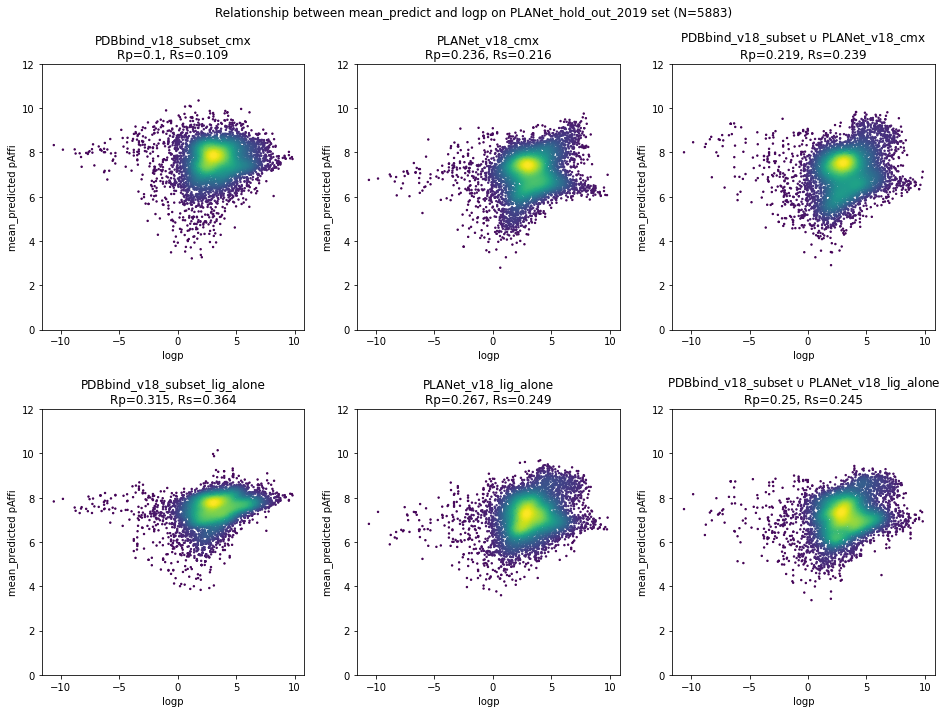

In [205]:
fig = plt.figure(figsize=(16,16))
for i, model in enumerate(models):
    for j, tp in enumerate(tps):
        # print((i+1)+6*j)
        ax = fig.add_subplot(3, 3, (i+1)+3*j)
        # fig, ax = plt.subplots(figsize=(6,6))

        y_true = mean_pred_df_with_prop['logp']
        y_pred = mean_pred_df_with_prop[f'{model}_{tp}_mean']

        xy = np.vstack([y_true.T, y_pred.T])
        z = gaussian_kde(xy)(xy)

        # Sort the points by density, so that the densest points are plotted last
        idx = z.argsort()
        y_true_, y_pred_, z = y_true[idx], y_pred[idx], z[idx]

        #https://github.com/hnlab/handbook/blob/41ad374cd0f9dc3ef882a7724eaac3d1f748fc05/0-General-computing-skills/MISC/vsfig.py#L83-L134
        # fig, ax = plt.subplots()
        ax.scatter(y_true_, y_pred_, s=2, c=z, zorder=2)

        # sns.scatterplot(x='mw', y=f'{model}_{tp}_mean', data=mean_pred_df_with_prop)

        # if model=='PDBbind_minimized_intersected_Uw':
        #     ax.axvline(x=800, color='black', linestyle='--')

        # ax.set_xlim(0, 60)
        ax.set_ylim(0, 12)

        ax.set_ylabel(f'mean_predicted pAffi')
        ax.set_xlabel('logp')
        ax.set_title(f'{simple_dict[model]}_{tp}\nRp={round(stats.pearsonr(mean_pred_df_with_prop[f"{model}_{tp}_mean"], mean_pred_df_with_prop["logp"])[0], 3)}, Rs={round(stats.spearmanr(mean_pred_df_with_prop[f"{model}_{tp}_mean"], mean_pred_df_with_prop["logp"])[0], 3)}')
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.93, 
                    wspace=0.2, 
                    hspace=0.3)
plt.suptitle(f'Relationship between mean_predict and logp on PLANet_hold_out_2019 set (N={len(PLANet_hold_property)})')
plt.savefig('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/mean_of_5_models/logp/scatter_for_12_models.png', dpi=300, bbox_inches='tight')

# 3. property match

# PDBbind_v18_subset

In [74]:
PDBbind_v18_subset = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/index/rm_all_simi_1/PDBbind_v18_subset_rm_simi_1.csv', sep='\t')
PDBbind_v18_subset

,pdb_id,-logAffi
0,3fl9,1.11
1,2hdq,1.40
2,1utp,1.44
3,1tnk,1.49
4,2hdr,1.72
...,...,...
5366,4n70,12.00
5367,3o9h,12.10
5368,3o9g,12.30
5369,1q83,12.39


In [75]:
PDBbind_whole_property = pd.read_csv('/pubhome/xli02/project/PLIM/analysis/20220812_paper/distribution/property/PDBbind_whole.csv', sep='\t')
PDBbind_whole_property

,pdb_id,-logAffi,mw,logp,rotb,hbd,hba,q,HA
0,3zzf,0.40,187.151,-3.2289,5.0,1.0,5.0,-2.0,13.0
1,3gww,0.45,310.339,3.4088,6.0,1.0,1.0,1.0,22.0
2,1w8l,0.49,141.214,1.2648,0.0,0.0,1.0,0.0,10.0
3,3fqa,0.49,136.130,-0.3677,1.0,1.0,3.0,-1.0,10.0
4,1zsb,0.60,222.251,-0.8561,2.0,2.0,6.0,0.0,13.0
...,...,...,...,...,...,...,...,...,...
17174,7cpa,13.96,580.574,2.5536,14.0,2.0,8.0,-2.0,41.0
17175,2xuf,14.39,658.854,8.6355,12.0,3.0,8.0,0.0,50.0
17176,1avd,15.00,243.308,-0.5379,5.0,2.0,4.0,-1.0,16.0
17177,2xui,15.00,658.854,8.6355,12.0,3.0,8.0,0.0,50.0


In [76]:
PDBbind_v18_subset_prop = PDBbind_whole_property[PDBbind_whole_property['pdb_id'].isin(PDBbind_v18_subset['pdb_id'])]
len(PDBbind_v18_subset_prop)

5371

# PLANet_v18

In [78]:
PLANet_v18 = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/index/rm_all_simi_1/PLANet_v18_rm_simi_1.csv', sep='\t')
PLANet_v18

,unique_identify,-logAffi
0,CHEMBL1075026_1swr_CHEMBL857,14.000000
1,CHEMBL1075027_1hp5_CHEMBL257158,4.698970
2,CHEMBL1075027_1hp5_CHEMBL403756,4.000000
3,CHEMBL1075027_1hp5_CHEMBL404356,3.698970
4,CHEMBL1075027_1jak_CHEMBL253537,4.677781
...,...,...
63599,CHEMBL6166_4zk5_CHEMBL3623138,8.431798
63600,CHEMBL6166_4zk5_CHEMBL3623139,8.795880
63601,CHEMBL6166_5di1_CHEMBL3754283,7.588909
63602,CHEMBL6166_5di1_CHEMBL3754304,6.285285


In [79]:
PLANet_property = pd.read_csv('/pubhome/xli02/project/PLIM/analysis/20220812_paper/distribution/property/PLANet_property.csv', sep='\t')
PLANet_v18_property = PLANet_property[PLANet_property['unique_identify'].isin(PLANet_v18['unique_identify'])]
len(PLANet_v18_property)

63604

# PDBbind_v18_subset_union_PLANet_v18

In [80]:
PIPUP_df = pd.concat([PDBbind_v18_subset_prop.rename(columns={'pdb_id':'unique_identify', '-logAffi':'y_true'})[['unique_identify', 'y_true', 'mw']].copy(), PLANet_v18_property.rename(columns={'-logAffi':'y_true'})[['unique_identify', 'y_true', 'mw']].copy()])
# PIPUP_df['dataset'] = 'PDBbind_subset_union_PLANet'
PIPUP_df

,unique_identify,y_true,mw
15,3fl9,1.110000,290.323
38,2hdq,1.400000,127.144
42,1utp,1.440000,150.245
44,1tnk,1.490000,136.218
73,2hdr,1.720000,152.129
...,...,...,...
69811,CHEMBL6166_4zk5_CHEMBL3623138,8.431798,405.433
69812,CHEMBL6166_4zk5_CHEMBL3623139,8.795880,394.410
69813,CHEMBL6166_5di1_CHEMBL3754283,7.588909,340.404
69814,CHEMBL6166_5di1_CHEMBL3754304,6.285285,367.430


In [81]:
PLANet_hold_property

,unique_identify,-logAffi,Target_chembl_id,Cry_lig_name,Cry_lig_smiles,Cry_lig_an,Similar_compnd_name,Similar_compnd_smiles,Similar_compnd_an,Similarity,...,MCS_smarts,target_compnd,mw,logp,rotb,hbd,hba,q,HA,dataset
135,CHEMBL1075159_5vfd_CHEMBL4298137,6.163784,CHEMBL1075159,5vfd,CC1=C[C@@H](C(N)=O)N2C[C@@H]1N(OS(=O)(=O)[O-])...,18,CHEMBL4298137,CC1=C[C@@H]2CN(C(=O)N2OS(=O)(=O)O)[C@@H]1C(N)=O,18,0.901624,...,[#6]1=&@[#6]-&@[#6](-&!@[#6](=&!@[#8])-&!@[#7]...,CHEMBL1075159_CHEMBL4298137,276.250,-1.7018,3.0,1.0,6.0,-1.0,18.0,PLANet
185,CHEMBL1075317_6dar_CHEMBL4276691,5.899629,CHEMBL1075317,6dar,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,30,CHEMBL4276691,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,31,0.972414,...,[#8]=&!@[#6](-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@...,CHEMBL1075317_CHEMBL4276691,415.537,4.9474,7.0,0.0,4.0,0.0,31.0,PLANet
186,CHEMBL1075317_6dar_CHEMBL4276791,6.732828,CHEMBL1075317,6dar,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,30,CHEMBL4276791,COc1cccc(C(=O)NCc2cc(-c3cn4c(n3)CCC4)ccc2N(C)C)c1,29,0.803030,...,[#6]-&!@[#8]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[...,CHEMBL1075317_CHEMBL4276791,390.487,3.5009,6.0,1.0,5.0,0.0,29.0,PLANet
187,CHEMBL1075317_6dar_CHEMBL4276998,5.407823,CHEMBL1075317,6dar,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,30,CHEMBL4276998,O=C(NCc1cccc(-c2cn3c(n2)CCC3)c1)c1ccccn1,24,0.727523,...,[#8]=&!@[#6](-&!@[#7]-&!@[#6]-&!@[#6]1:&@[#6]:...,CHEMBL1075317_CHEMBL4276998,318.380,2.8213,4.0,1.0,4.0,0.0,24.0,PLANet
188,CHEMBL1075317_6dar_CHEMBL4277278,5.142065,CHEMBL1075317,6dar,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,30,CHEMBL4277278,O=C(NCc1cccc(-c2cn3c(n2)CCC3)c1)c1ccccc1,24,0.798395,...,[#8]=&!@[#6](-&!@[#7]-&!@[#6]-&!@[#6]1:&@[#6]:...,CHEMBL1075317_CHEMBL4277278,317.392,3.4263,4.0,1.0,3.0,0.0,24.0,PLANet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69547,CHEMBL6154_5nut_CHEMBL4290134,8.060481,CHEMBL6154,5nut,CC(C)Oc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,CHEMBL4290134,CC(C)(C)c1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,0.777580,...,[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)...,CHEMBL6154_CHEMBL4290134,278.355,3.8876,1.0,1.0,2.0,0.0,21.0,PLANet
69548,CHEMBL6154_5nut_CHEMBL4447252,7.978811,CHEMBL6154,5nut,CC(C)Oc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,CHEMBL4447252,CC(C)(O)c1ccc(-c2nc3ccc(F)cc3c(=O)[nH]2)cc1,22,0.720447,...,[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)...,CHEMBL6154_CHEMBL4447252,298.317,2.9566,2.0,2.0,3.0,0.0,22.0,PLANet
69549,CHEMBL6154_5nut_CHEMBL4455904,7.920819,CHEMBL6154,5nut,CC(C)Oc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,CHEMBL4455904,CN1CCN(c2ccc(-c3nc4ccc(F)cc4c(=O)[nH]3)cc2)CC1,25,0.704334,...,[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)...,CHEMBL6154_CHEMBL4455904,339.394,1.0639,2.0,2.0,3.0,1.0,25.0,PLANet
69550,CHEMBL6154_5nut_CHEMBL4475367,7.886057,CHEMBL6154,5nut,CC(C)Oc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,CHEMBL4475367,CC(C)(O)c1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,0.763293,...,[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)...,CHEMBL6154_CHEMBL4475367,280.327,2.8175,2.0,2.0,3.0,0.0,21.0,PLANet


# PDBbind_v18_subset vs PLANet_hold_out_2019

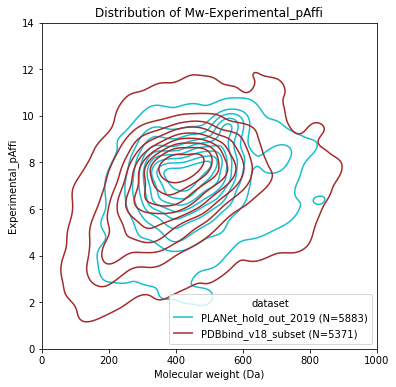

In [91]:
fig, ax = plt.subplots(figsize=(6,6))
sns.kdeplot(data=PLANet_hold_property, x='mw', y='-logAffi', color='tab:cyan', thresh=0.01)
sns.kdeplot(data=PDBbind_v18_subset_prop, x='mw', y='-logAffi', color='brown', thresh=0.01)
ax.set_xlabel("Molecular weight (Da)")
ax.set_ylabel("Experimental_pAffi")
ax.set_xlim(0,1000)
ax.set_ylim(0,14)
ax.set_title(f'Distribution of Mw-Experimental_pAffi')
plt.legend(labels=[f'PLANet_hold_out_2019 (N={len(PLANet_hold_property)})', f'PDBbind_v18_subset (N={len(PDBbind_v18_subset_prop)})'], title = "dataset", loc='lower right')
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/property_match/PIP_vs_hold_thresh_0.01.png', dpi=300, bbox_inches='tight')
# plt.close()

# PLANet_v18 vs PLANet_hold_out_2019

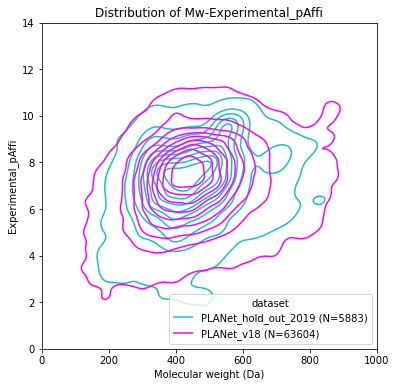

In [92]:
fig, ax = plt.subplots(figsize=(6,6))
sns.kdeplot(data=PLANet_hold_property, x='mw', y='-logAffi', color='tab:cyan', thresh=0.01)
sns.kdeplot(data=PLANet_v18_property, x='mw', y='-logAffi', color='magenta', thresh=0.01)
ax.set_xlabel("Molecular weight (Da)")
ax.set_ylabel("Experimental_pAffi")
ax.set_xlim(0,1000)
ax.set_ylim(0,14)
ax.set_title(f'Distribution of Mw-Experimental_pAffi')
plt.legend(labels=[f'PLANet_hold_out_2019 (N={len(PLANet_hold_property)})', f'PLANet_v18 (N={len(PLANet_v18_property)})'], title = "dataset", loc='lower right')
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/property_match/PLANet_vs_hold_thresh_0.01.png', dpi=300, bbox_inches='tight')
# plt.close()

# PIPUP vs PLANet_hold_out_2019

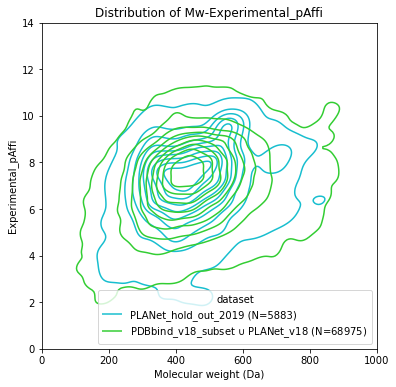

In [93]:
fig, ax = plt.subplots(figsize=(6,6))
sns.kdeplot(data=PLANet_hold_property, x='mw', y='-logAffi', color='tab:cyan', thresh=0.01)
sns.kdeplot(data=PIPUP_df, x='mw', y='y_true', color='limegreen', thresh=0.01)
ax.set_xlabel("Molecular weight (Da)")
ax.set_ylabel("Experimental_pAffi")
ax.set_xlim(0,1000)
ax.set_ylim(0,14)
ax.set_title(f'Distribution of Mw-Experimental_pAffi')
plt.legend(labels=[f'PLANet_hold_out_2019 (N={len(PLANet_hold_property)})', f'PDBbind_v18_subset '+r'$\cup{}$' + f' PLANet_v18 (N={len(PIPUP_df)})'], title = "dataset", loc='lower right')
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/property_match/PIPUP_vs_hold_thresh_0.01.png', dpi=300, bbox_inches='tight')
# plt.close()

# 4. similarity: see `evaluation_1_20220824.ipynb`

# 5. property distribution of PLANet_hold_out_2019

In [94]:
PLANet_hold_property

,unique_identify,-logAffi,Target_chembl_id,Cry_lig_name,Cry_lig_smiles,Cry_lig_an,Similar_compnd_name,Similar_compnd_smiles,Similar_compnd_an,Similarity,...,MCS_smarts,target_compnd,mw,logp,rotb,hbd,hba,q,HA,dataset
135,CHEMBL1075159_5vfd_CHEMBL4298137,6.163784,CHEMBL1075159,5vfd,CC1=C[C@@H](C(N)=O)N2C[C@@H]1N(OS(=O)(=O)[O-])...,18,CHEMBL4298137,CC1=C[C@@H]2CN(C(=O)N2OS(=O)(=O)O)[C@@H]1C(N)=O,18,0.901624,...,[#6]1=&@[#6]-&@[#6](-&!@[#6](=&!@[#8])-&!@[#7]...,CHEMBL1075159_CHEMBL4298137,276.250,-1.7018,3.0,1.0,6.0,-1.0,18.0,PLANet
185,CHEMBL1075317_6dar_CHEMBL4276691,5.899629,CHEMBL1075317,6dar,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,30,CHEMBL4276691,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,31,0.972414,...,[#8]=&!@[#6](-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@...,CHEMBL1075317_CHEMBL4276691,415.537,4.9474,7.0,0.0,4.0,0.0,31.0,PLANet
186,CHEMBL1075317_6dar_CHEMBL4276791,6.732828,CHEMBL1075317,6dar,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,30,CHEMBL4276791,COc1cccc(C(=O)NCc2cc(-c3cn4c(n3)CCC4)ccc2N(C)C)c1,29,0.803030,...,[#6]-&!@[#8]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[...,CHEMBL1075317_CHEMBL4276791,390.487,3.5009,6.0,1.0,5.0,0.0,29.0,PLANet
187,CHEMBL1075317_6dar_CHEMBL4276998,5.407823,CHEMBL1075317,6dar,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,30,CHEMBL4276998,O=C(NCc1cccc(-c2cn3c(n2)CCC3)c1)c1ccccn1,24,0.727523,...,[#8]=&!@[#6](-&!@[#7]-&!@[#6]-&!@[#6]1:&@[#6]:...,CHEMBL1075317_CHEMBL4276998,318.380,2.8213,4.0,1.0,4.0,0.0,24.0,PLANet
188,CHEMBL1075317_6dar_CHEMBL4277278,5.142065,CHEMBL1075317,6dar,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,30,CHEMBL4277278,O=C(NCc1cccc(-c2cn3c(n2)CCC3)c1)c1ccccc1,24,0.798395,...,[#8]=&!@[#6](-&!@[#7]-&!@[#6]-&!@[#6]1:&@[#6]:...,CHEMBL1075317_CHEMBL4277278,317.392,3.4263,4.0,1.0,3.0,0.0,24.0,PLANet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69547,CHEMBL6154_5nut_CHEMBL4290134,8.060481,CHEMBL6154,5nut,CC(C)Oc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,CHEMBL4290134,CC(C)(C)c1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,0.777580,...,[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)...,CHEMBL6154_CHEMBL4290134,278.355,3.8876,1.0,1.0,2.0,0.0,21.0,PLANet
69548,CHEMBL6154_5nut_CHEMBL4447252,7.978811,CHEMBL6154,5nut,CC(C)Oc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,CHEMBL4447252,CC(C)(O)c1ccc(-c2nc3ccc(F)cc3c(=O)[nH]2)cc1,22,0.720447,...,[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)...,CHEMBL6154_CHEMBL4447252,298.317,2.9566,2.0,2.0,3.0,0.0,22.0,PLANet
69549,CHEMBL6154_5nut_CHEMBL4455904,7.920819,CHEMBL6154,5nut,CC(C)Oc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,CHEMBL4455904,CN1CCN(c2ccc(-c3nc4ccc(F)cc4c(=O)[nH]3)cc2)CC1,25,0.704334,...,[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)...,CHEMBL6154_CHEMBL4455904,339.394,1.0639,2.0,2.0,3.0,1.0,25.0,PLANet
69550,CHEMBL6154_5nut_CHEMBL4475367,7.886057,CHEMBL6154,5nut,CC(C)Oc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,CHEMBL4475367,CC(C)(O)c1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,0.763293,...,[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)...,CHEMBL6154_CHEMBL4475367,280.327,2.8175,2.0,2.0,3.0,0.0,21.0,PLANet


In [95]:
PLANet_hold_property.reset_index(inplace=True)

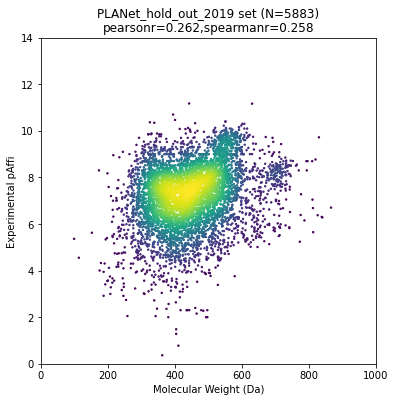

In [97]:
pearsonr = round(stats.pearsonr(PLANet_hold_property['mw'], PLANet_hold_property['-logAffi'])[0],3)
spearmanr = round(stats.spearmanr(PLANet_hold_property['mw'], PLANet_hold_property['-logAffi'])[0],3)

xy = np.vstack([PLANet_hold_property['mw'], PLANet_hold_property['-logAffi']])  #按行叠加
g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
z = g(xy)  #计算每个xy样本点的概率密度

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()  #对z值排序并返回索引
y, y_, z = PLANet_hold_property['mw'][idx], PLANet_hold_property['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(y, y_, s=2, c=z, zorder=2)
ax.set_xlabel('Molecular Weight (Da)')
ax.set_ylabel('Experimental pAffi')
ax.set_xlim(0,1000)
ax.set_ylim(0,14)
plt.title(f'PLANet_hold_out_2019 set (N={len(PLANet_hold_property)})\npearsonr={pearsonr},spearmanr={spearmanr}')
plt.savefig('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/property_distribution/Mw_pAffi_scaled_1000.png', dpi=300, bbox_inches='tight')

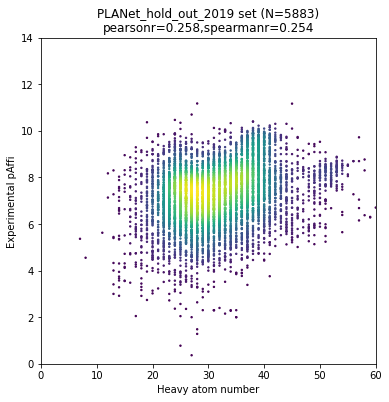

In [98]:
# RIP_minimized_PCV.reset_index(drop=True, inplace=True)
pearsonr = round(stats.pearsonr(PLANet_hold_property['HA'], PLANet_hold_property['-logAffi'])[0],3)
spearmanr = round(stats.spearmanr(PLANet_hold_property['HA'], PLANet_hold_property['-logAffi'])[0],3)

xy = np.vstack([PLANet_hold_property['HA'], PLANet_hold_property['-logAffi']])  #按行叠加
g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
z = g(xy)  #计算每个xy样本点的概率密度

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()  #对z值排序并返回索引
y, y_, z = PLANet_hold_property['HA'][idx], PLANet_hold_property['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(y, y_, s=2, c=z, zorder=2)
ax.set_xlabel('Heavy atom number')
ax.set_ylabel('Experimental pAffi')
ax.set_xlim(0,60)
ax.set_ylim(0,14)
plt.title(f'PLANet_hold_out_2019 set (N={len(PLANet_hold_property)})\npearsonr={pearsonr},spearmanr={spearmanr}')
plt.savefig('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/property_distribution/HA_pAffi_scaled_1000.png', dpi=300, bbox_inches='tight')

# 6. pfam

In [101]:
PLANet_hold_property

,index,unique_identify,-logAffi,Target_chembl_id,Cry_lig_name,Cry_lig_smiles,Cry_lig_an,Similar_compnd_name,Similar_compnd_smiles,Similar_compnd_an,...,MCS_smarts,target_compnd,mw,logp,rotb,hbd,hba,q,HA,dataset
0,135,CHEMBL1075159_5vfd_CHEMBL4298137,6.163784,CHEMBL1075159,5vfd,CC1=C[C@@H](C(N)=O)N2C[C@@H]1N(OS(=O)(=O)[O-])...,18,CHEMBL4298137,CC1=C[C@@H]2CN(C(=O)N2OS(=O)(=O)O)[C@@H]1C(N)=O,18,...,[#6]1=&@[#6]-&@[#6](-&!@[#6](=&!@[#8])-&!@[#7]...,CHEMBL1075159_CHEMBL4298137,276.250,-1.7018,3.0,1.0,6.0,-1.0,18.0,PLANet
1,185,CHEMBL1075317_6dar_CHEMBL4276691,5.899629,CHEMBL1075317,6dar,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,30,CHEMBL4276691,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,31,...,[#8]=&!@[#6](-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@...,CHEMBL1075317_CHEMBL4276691,415.537,4.9474,7.0,0.0,4.0,0.0,31.0,PLANet
2,186,CHEMBL1075317_6dar_CHEMBL4276791,6.732828,CHEMBL1075317,6dar,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,30,CHEMBL4276791,COc1cccc(C(=O)NCc2cc(-c3cn4c(n3)CCC4)ccc2N(C)C)c1,29,...,[#6]-&!@[#8]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[...,CHEMBL1075317_CHEMBL4276791,390.487,3.5009,6.0,1.0,5.0,0.0,29.0,PLANet
3,187,CHEMBL1075317_6dar_CHEMBL4276998,5.407823,CHEMBL1075317,6dar,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,30,CHEMBL4276998,O=C(NCc1cccc(-c2cn3c(n2)CCC3)c1)c1ccccn1,24,...,[#8]=&!@[#6](-&!@[#7]-&!@[#6]-&!@[#6]1:&@[#6]:...,CHEMBL1075317_CHEMBL4276998,318.380,2.8213,4.0,1.0,4.0,0.0,24.0,PLANet
4,188,CHEMBL1075317_6dar_CHEMBL4277278,5.142065,CHEMBL1075317,6dar,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,30,CHEMBL4277278,O=C(NCc1cccc(-c2cn3c(n2)CCC3)c1)c1ccccc1,24,...,[#8]=&!@[#6](-&!@[#7]-&!@[#6]-&!@[#6]1:&@[#6]:...,CHEMBL1075317_CHEMBL4277278,317.392,3.4263,4.0,1.0,3.0,0.0,24.0,PLANet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,69547,CHEMBL6154_5nut_CHEMBL4290134,8.060481,CHEMBL6154,5nut,CC(C)Oc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,CHEMBL4290134,CC(C)(C)c1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,...,[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)...,CHEMBL6154_CHEMBL4290134,278.355,3.8876,1.0,1.0,2.0,0.0,21.0,PLANet
5879,69548,CHEMBL6154_5nut_CHEMBL4447252,7.978811,CHEMBL6154,5nut,CC(C)Oc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,CHEMBL4447252,CC(C)(O)c1ccc(-c2nc3ccc(F)cc3c(=O)[nH]2)cc1,22,...,[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)...,CHEMBL6154_CHEMBL4447252,298.317,2.9566,2.0,2.0,3.0,0.0,22.0,PLANet
5880,69549,CHEMBL6154_5nut_CHEMBL4455904,7.920819,CHEMBL6154,5nut,CC(C)Oc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,CHEMBL4455904,CN1CCN(c2ccc(-c3nc4ccc(F)cc4c(=O)[nH]3)cc2)CC1,25,...,[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)...,CHEMBL6154_CHEMBL4455904,339.394,1.0639,2.0,2.0,3.0,1.0,25.0,PLANet
5881,69550,CHEMBL6154_5nut_CHEMBL4475367,7.886057,CHEMBL6154,5nut,CC(C)Oc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,CHEMBL4475367,CC(C)(O)c1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,...,[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)...,CHEMBL6154_CHEMBL4475367,280.327,2.8175,2.0,2.0,3.0,0.0,21.0,PLANet


In [106]:
PDBbind_v2020_cluster = pd.read_csv('/pubhome/xli02/scripts/scripts_from_zhuhui/general_refine_classified.csv')
PDBbind_v2020_cluster_sel = PDBbind_v2020_cluster[['pdb', 'PCV_cluster']].copy()
PDBbind_v2020_cluster_sel.rename(columns={'pdb':'Cry_lig_name'}, inplace=True)
PDBbind_v2020_cluster_sel

,Cry_lig_name,PCV_cluster
0,4i7p,Lysozyme
1,1l83,Lysozyme
2,1li6,Lysozyme
3,4w52,Lysozyme
4,188l,Lysozyme
...,...,...
19434,5ylv,una_223
19435,3ump,Ribokinase
19436,4q3r,Arginase
19437,1ind,Ig


In [107]:
PLANet_hold_property_Pfam = pd.merge(PLANet_hold_property, PDBbind_v2020_cluster_sel, on='Cry_lig_name')
PLANet_hold_property_Pfam

,index,unique_identify,-logAffi,Target_chembl_id,Cry_lig_name,Cry_lig_smiles,Cry_lig_an,Similar_compnd_name,Similar_compnd_smiles,Similar_compnd_an,...,target_compnd,mw,logp,rotb,hbd,hba,q,HA,dataset,PCV_cluster
0,135,CHEMBL1075159_5vfd_CHEMBL4298137,6.163784,CHEMBL1075159,5vfd,CC1=C[C@@H](C(N)=O)N2C[C@@H]1N(OS(=O)(=O)[O-])...,18,CHEMBL4298137,CC1=C[C@@H]2CN(C(=O)N2OS(=O)(=O)O)[C@@H]1C(N)=O,18,...,CHEMBL1075159_CHEMBL4298137,276.250,-1.7018,3.0,1.0,6.0,-1.0,18.0,PLANet,Beta-lactamase
1,185,CHEMBL1075317_6dar_CHEMBL4276691,5.899629,CHEMBL1075317,6dar,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,30,CHEMBL4276691,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,31,...,CHEMBL1075317_CHEMBL4276691,415.537,4.9474,7.0,0.0,4.0,0.0,31.0,PLANet,Beta_propeller
2,186,CHEMBL1075317_6dar_CHEMBL4276791,6.732828,CHEMBL1075317,6dar,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,30,CHEMBL4276791,COc1cccc(C(=O)NCc2cc(-c3cn4c(n3)CCC4)ccc2N(C)C)c1,29,...,CHEMBL1075317_CHEMBL4276791,390.487,3.5009,6.0,1.0,5.0,0.0,29.0,PLANet,Beta_propeller
3,187,CHEMBL1075317_6dar_CHEMBL4276998,5.407823,CHEMBL1075317,6dar,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,30,CHEMBL4276998,O=C(NCc1cccc(-c2cn3c(n2)CCC3)c1)c1ccccn1,24,...,CHEMBL1075317_CHEMBL4276998,318.380,2.8213,4.0,1.0,4.0,0.0,24.0,PLANet,Beta_propeller
4,188,CHEMBL1075317_6dar_CHEMBL4277278,5.142065,CHEMBL1075317,6dar,COc1cccc(C(=O)N(Cc2cccc(-c3cn4c(n3)CCC4)c2)CC2...,30,CHEMBL4277278,O=C(NCc1cccc(-c2cn3c(n2)CCC3)c1)c1ccccc1,24,...,CHEMBL1075317_CHEMBL4277278,317.392,3.4263,4.0,1.0,3.0,0.0,24.0,PLANet,Beta_propeller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,69547,CHEMBL6154_5nut_CHEMBL4290134,8.060481,CHEMBL6154,5nut,CC(C)Oc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,CHEMBL4290134,CC(C)(C)c1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,...,CHEMBL6154_CHEMBL4290134,278.355,3.8876,1.0,1.0,2.0,0.0,21.0,PLANet,ADP-ribosyl
5879,69548,CHEMBL6154_5nut_CHEMBL4447252,7.978811,CHEMBL6154,5nut,CC(C)Oc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,CHEMBL4447252,CC(C)(O)c1ccc(-c2nc3ccc(F)cc3c(=O)[nH]2)cc1,22,...,CHEMBL6154_CHEMBL4447252,298.317,2.9566,2.0,2.0,3.0,0.0,22.0,PLANet,ADP-ribosyl
5880,69549,CHEMBL6154_5nut_CHEMBL4455904,7.920819,CHEMBL6154,5nut,CC(C)Oc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,CHEMBL4455904,CN1CCN(c2ccc(-c3nc4ccc(F)cc4c(=O)[nH]3)cc2)CC1,25,...,CHEMBL6154_CHEMBL4455904,339.394,1.0639,2.0,2.0,3.0,1.0,25.0,PLANet,ADP-ribosyl
5881,69550,CHEMBL6154_5nut_CHEMBL4475367,7.886057,CHEMBL6154,5nut,CC(C)Oc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,CHEMBL4475367,CC(C)(O)c1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,21,...,CHEMBL6154_CHEMBL4475367,280.327,2.8175,2.0,2.0,3.0,0.0,21.0,PLANet,ADP-ribosyl


In [108]:
len(set(PLANet_hold_property_Pfam['PCV_cluster']))

72

In [109]:
PCV_count_df = pd.DataFrame({'count':PLANet_hold_property_Pfam.groupby('PCV_cluster').size()}).reset_index()
PCV_count_df.sort_values(by='count', ascending=False).head(10)

,PCV_cluster,count
61,pkinase,1642
60,hormone_recep,507
55,SWIB,459
27,HD_PDEase,306
36,Neur_chan_LBD,305
11,Bromodomain,274
15,Carb_anhydrase,240
23,GPCR_A,233
6,BCLiA,179
54,SET,133


In [114]:
# res_df = pd.read_csv(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/test_result/test_on_PLANet_hold_out_2019/PLANet_v18_cmx/test.csv', sep='\t')
# res_df['cry_lig'] = res_df['unique_identify'].str.split('_').str[1]
# res_df

In [113]:
top10_clusters=list(PCV_count_df.sort_values(by='count', ascending=False).head(10)['PCV_cluster'])
pfam_label_to_res_dict = defaultdict(list)
for model in models:
    for tp in tps:
        res_df = pd.read_csv(f'{test_dir}/test_on_PLANet_hold_out_2019/{model}_{tp}/test.csv', sep='\t')
        res_df['cry_lig'] = res_df['unique_identify'].str.split('_').str[1]
        res_df_with_PCV = pd.merge(res_df, PDBbind_v2020_cluster_sel.rename(columns={'Cry_lig_name':'cry_lig'}), on='cry_lig')
        for cluster in top10_clusters:
            hold_out_cluster = res_df_with_PCV[res_df_with_PCV['PCV_cluster']==cluster].copy()
            for i in range(5):
                r2 = r2_score(y_true=hold_out_cluster['y_true'], y_pred=hold_out_cluster[f'{model}_{tp}_{i+1}_pred'])
                mae = mean_absolute_error(y_true=hold_out_cluster['y_true'], y_pred=hold_out_cluster[f'{model}_{tp}_{i+1}_pred'])
                mse = mean_squared_error(y_true=hold_out_cluster['y_true'], y_pred=hold_out_cluster[f'{model}_{tp}_{i+1}_pred'])
                pearsonr = stats.pearsonr(hold_out_cluster['y_true'], hold_out_cluster[f'{model}_{tp}_{i+1}_pred'])[0]
                spearmanr = stats.spearmanr(hold_out_cluster['y_true'], hold_out_cluster[f'{model}_{tp}_{i+1}_pred'])[0]
                pfam_label_to_res_dict[f'{model}_{tp}_{i+1}_cluster_{cluster}']=[r2, mae, mse, pearsonr, spearmanr]
        cluster='others'
        hold_out_cluster = res_df_with_PCV[~res_df_with_PCV['PCV_cluster'].isin(top10_clusters)].copy()
        for i in range(5):
            r2 = r2_score(y_true=hold_out_cluster['y_true'], y_pred=hold_out_cluster[f'{model}_{tp}_{i+1}_pred'])
            mae = mean_absolute_error(y_true=hold_out_cluster['y_true'], y_pred=hold_out_cluster[f'{model}_{tp}_{i+1}_pred'])
            mse = mean_squared_error(y_true=hold_out_cluster['y_true'], y_pred=hold_out_cluster[f'{model}_{tp}_{i+1}_pred'])
            pearsonr = stats.pearsonr(hold_out_cluster['y_true'], hold_out_cluster[f'{model}_{tp}_{i+1}_pred'])[0]
            spearmanr = stats.spearmanr(hold_out_cluster['y_true'], hold_out_cluster[f'{model}_{tp}_{i+1}_pred'])[0]
            pfam_label_to_res_dict[f'{model}_{tp}_{i+1}_cluster_{cluster}']=[r2, mae, mse, pearsonr, spearmanr]

In [116]:
pfam_sum_df = pd.DataFrame.from_dict(pfam_label_to_res_dict, orient='index', columns=['r2', 'mae', 'mse', 'pearsonr', 'spearmanr']).reset_index()
pfam_sum_df['rmse']= np.sqrt(pfam_sum_df['mse'])
pfam_sum_df.rename(columns={"index": "model_names_test_type_cluster"}, inplace=True)
pfam_sum_df['cluster'] = pfam_sum_df['model_names_test_type_cluster'].str.rsplit('cluster_', n=1).str[1]
pfam_sum_df['model_names_test_type'] = pfam_sum_df['model_names_test_type_cluster'].str.rsplit('_cluster', n=1).str[0]
pfam_sum_df['model_tp'] = pfam_sum_df['model_names_test_type'].str.rsplit('_', n=1).str[0]
pfam_sum_df['type'] = ['cmx' if 'cmx' in m else 'ligand_alone' for m in pfam_sum_df['model_tp']]
pfam_sum_df['dataset'] = ['_'.join(m.split('_')[:-1]) if 'cmx' in m else '_'.join(m.split('_')[:-2]) for m in pfam_sum_df['model_tp']]
pfam_sum_df.to_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/pfam_cluster/6_models_5_repeats_metrics.csv', sep='\t', index=False)
pfam_sum_df

,model_names_test_type_cluster,r2,mae,mse,pearsonr,spearmanr,rmse,cluster,model_names_test_type,model_tp,type,dataset
0,PDBbind_minimized_v18_subset_cmx_1_cluster_pki...,-0.027446,1.015669,1.840551,0.307923,0.271654,1.356669,pkinase,PDBbind_minimized_v18_subset_cmx_1,PDBbind_minimized_v18_subset_cmx,cmx,PDBbind_minimized_v18_subset
1,PDBbind_minimized_v18_subset_cmx_2_cluster_pki...,-0.011796,0.999948,1.812516,0.327810,0.276114,1.346297,pkinase,PDBbind_minimized_v18_subset_cmx_2,PDBbind_minimized_v18_subset_cmx,cmx,PDBbind_minimized_v18_subset
2,PDBbind_minimized_v18_subset_cmx_3_cluster_pki...,-0.009899,0.994834,1.809117,0.299177,0.265828,1.345034,pkinase,PDBbind_minimized_v18_subset_cmx_3,PDBbind_minimized_v18_subset_cmx,cmx,PDBbind_minimized_v18_subset
3,PDBbind_minimized_v18_subset_cmx_4_cluster_pki...,-0.112529,1.057447,1.992967,0.312010,0.290222,1.411725,pkinase,PDBbind_minimized_v18_subset_cmx_4,PDBbind_minimized_v18_subset_cmx,cmx,PDBbind_minimized_v18_subset
4,PDBbind_minimized_v18_subset_cmx_5_cluster_pki...,-0.091198,1.038888,1.954755,0.316128,0.286113,1.398126,pkinase,PDBbind_minimized_v18_subset_cmx_5,PDBbind_minimized_v18_subset_cmx,cmx,PDBbind_minimized_v18_subset
...,...,...,...,...,...,...,...,...,...,...,...,...
325,PDBbind_minimized_v18_subset_union_PLANet_v18_...,-0.184525,1.134015,2.071680,0.300829,0.271163,1.439333,others,PDBbind_minimized_v18_subset_union_PLANet_v18_...,PDBbind_minimized_v18_subset_union_PLANet_v18_...,ligand_alone,PDBbind_minimized_v18_subset_union_PLANet_v18
326,PDBbind_minimized_v18_subset_union_PLANet_v18_...,-0.128828,1.120459,1.974268,0.344558,0.318772,1.405086,others,PDBbind_minimized_v18_subset_union_PLANet_v18_...,PDBbind_minimized_v18_subset_union_PLANet_v18_...,ligand_alone,PDBbind_minimized_v18_subset_union_PLANet_v18
327,PDBbind_minimized_v18_subset_union_PLANet_v18_...,-0.085749,1.086915,1.898926,0.359338,0.342439,1.378015,others,PDBbind_minimized_v18_subset_union_PLANet_v18_...,PDBbind_minimized_v18_subset_union_PLANet_v18_...,ligand_alone,PDBbind_minimized_v18_subset_union_PLANet_v18
328,PDBbind_minimized_v18_subset_union_PLANet_v18_...,-0.061564,1.080882,1.856627,0.366936,0.355470,1.362581,others,PDBbind_minimized_v18_subset_union_PLANet_v18_...,PDBbind_minimized_v18_subset_union_PLANet_v18_...,ligand_alone,PDBbind_minimized_v18_subset_union_PLANet_v18


In [123]:
np.sum(list(cluster_11_count.values()))

4464

In [124]:
cluster_11_count = {}
for cluster in top10_clusters+['others']:
    if cluster != 'others':
        cluster_11_count[cluster]=PCV_count_df[PCV_count_df['PCV_cluster']==cluster]['count'].values[0]
    else:
        cluster_11_count[cluster]=len(PLANet_hold_property_Pfam) - np.sum(list(cluster_11_count.values())) #
cluster_11_count


{'pkinase': 1642,
 'hormone_recep': 507,
 'SWIB': 459,
 'HD_PDEase': 306,
 'Neur_chan_LBD': 305,
 'Bromodomain': 274,
 'Carb_anhydrase': 240,
 'GPCR_A': 233,
 'BCLiA': 179,
 'SET': 133,
 'others': 1605}

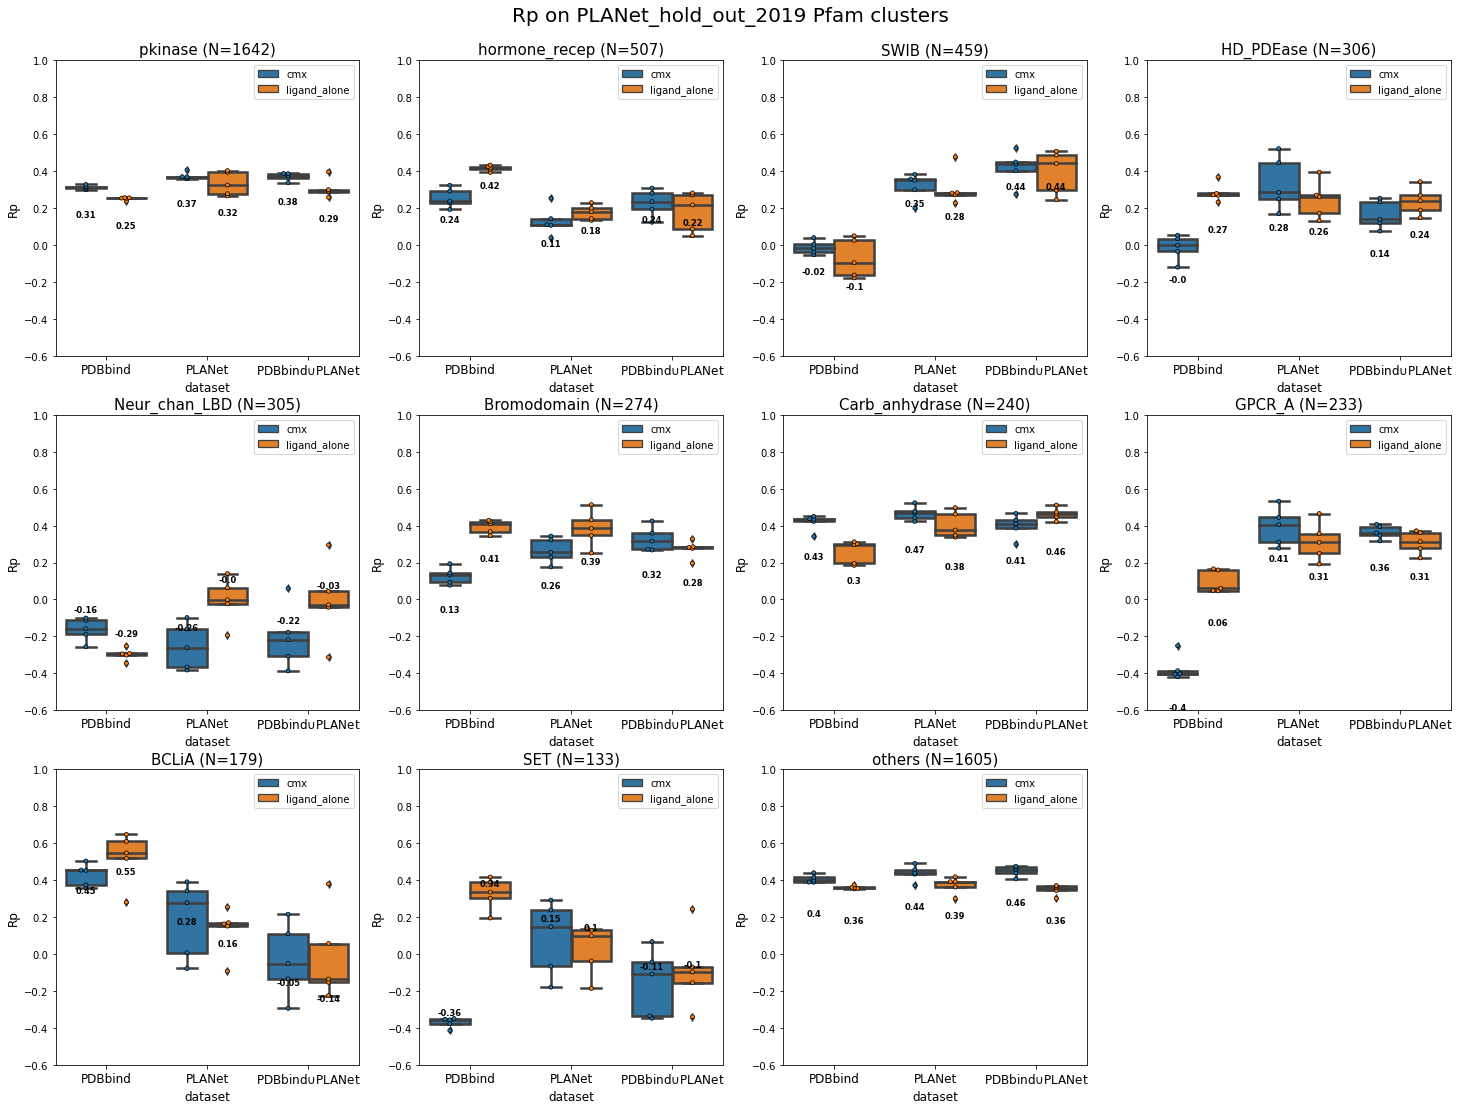

In [149]:
metric='pearsonr'
fig = plt.figure(figsize=(25,25))
for i, cluster in enumerate(top10_clusters+['others']):
    cluster_sum_df = pfam_sum_df[pfam_sum_df['cluster']==cluster]
    grouped_median_cluster = cluster_sum_df.groupby(['dataset', 'type']).median().reset_index()
    grouped_median_cluster['model_name'] = [f'{row.dataset}_{row.type}' for row in grouped_median_cluster.itertuples()]
    
    ax = fig.add_subplot(4, 4, i+1)
    sns.boxplot(x="dataset", y=metric, data=cluster_sum_df, hue="type", order = models, linewidth=2.5)
    sns.swarmplot(x="dataset", y=metric, data=cluster_sum_df, hue="type", order = models, size = 4, dodge=True, edgecolor="black", linewidth=0.7)

    ax.set_title(f'{cluster} (N={cluster_11_count[cluster]})', fontsize=15)
    # fig.autofmt_xdate()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2])
    vertical_offset = cluster_sum_df[metric].median() * 0.5 # offset from median for display
    for i, modl in enumerate(models):
        for tp in ['cmx', 'ligand_alone']:
            median_metric = round(grouped_median_cluster.loc[(grouped_median_cluster['model_name'] == f'{modl}_{tp}')][metric].values[0], 2)
            if cluster in ['HD_PDEase','GPCR_A', 'Bromodomain']:
                if tp == 'cmx':
                    ax.text(i-.2, median_metric-0.2, median_metric, horizontalalignment='center',size='small', weight='semibold')
                else:
                    ax.text(i+.2, median_metric-0.2, median_metric, horizontalalignment='center',size='small',weight='semibold')
            else:
                if tp == 'cmx':
                    ax.text(i-.2, median_metric-vertical_offset, median_metric, horizontalalignment='center',size='small', weight='semibold')
                else:
                    ax.text(i+.2, median_metric-vertical_offset, median_metric, horizontalalignment='center',size='small',weight='semibold')
    ax.set_ylim(-0.6,1)
    ax.set_xticklabels(['PDBbind', 'PLANet', 'PDBbind'+r'$\cup{}$' + 'PLANet'], fontsize=12)
    ax.set_ylabel('Rp', fontsize=12)
    ax.set_xlabel('dataset', fontsize=12)
plt.suptitle('Rp on PLANet_hold_out_2019 Pfam clusters', y=0.91, fontsize=20)
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/pfam_cluster/top10_clusters_{metric}_mean_of_5_repeat_models.png', dpi=300, bbox_inches='tight')
# plt.close()

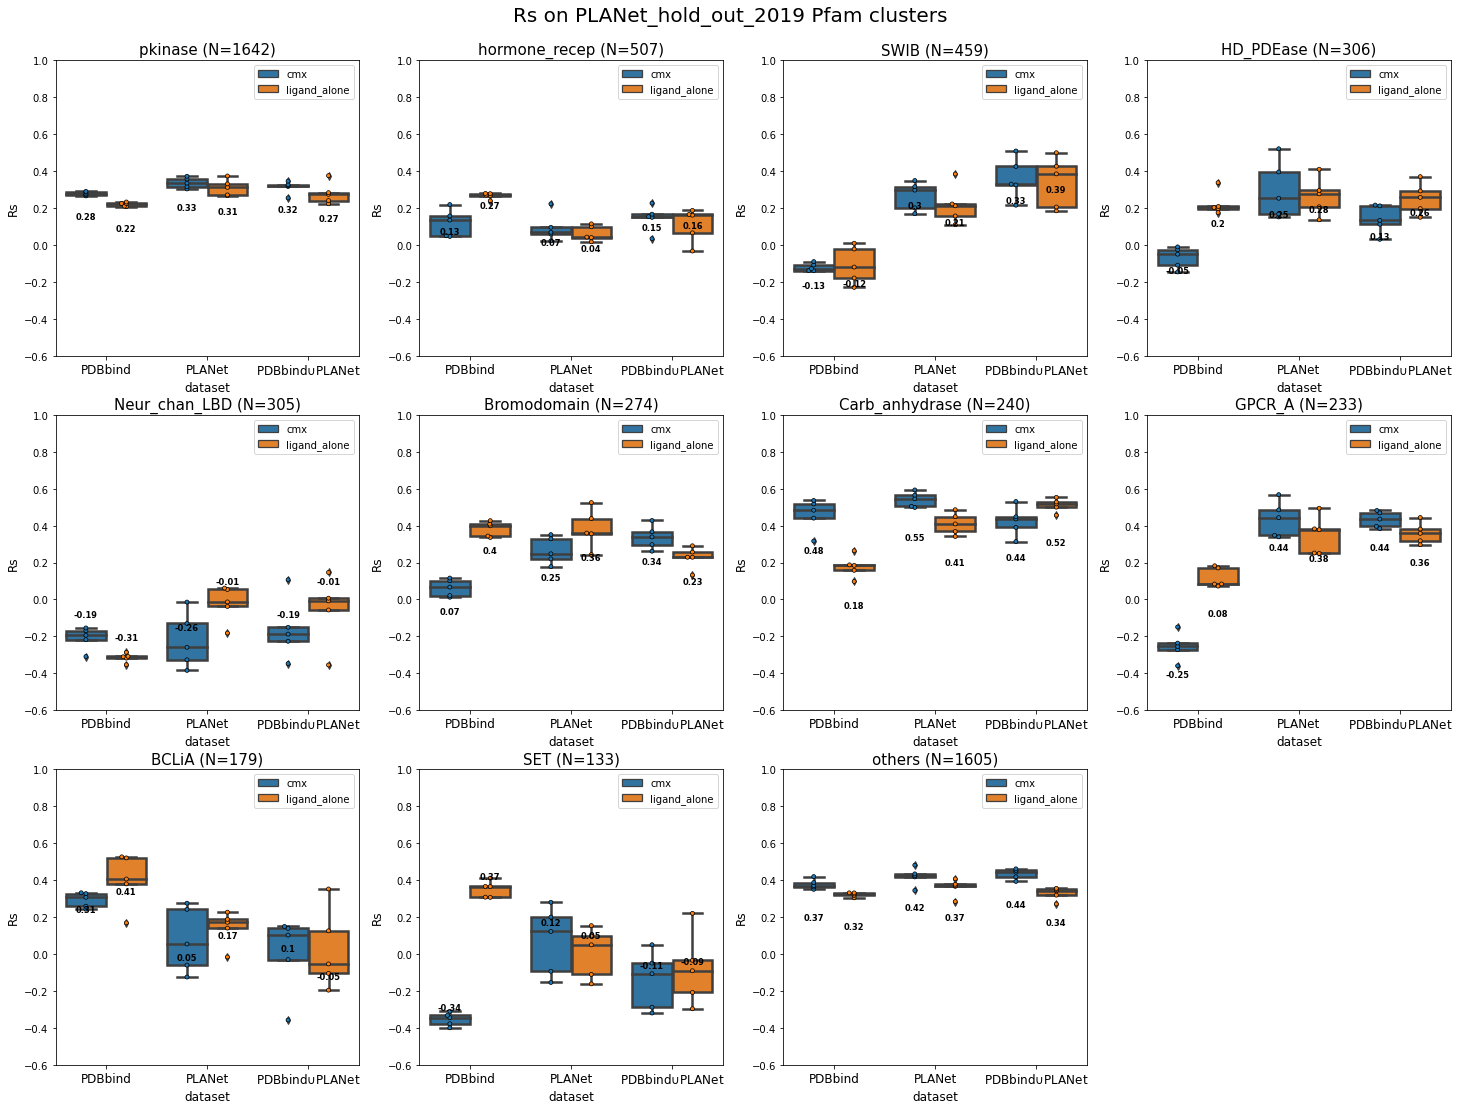

In [128]:
metric='spearmanr'
fig = plt.figure(figsize=(25,25))
for i, cluster in enumerate(top10_clusters+['others']):
    cluster_sum_df = pfam_sum_df[pfam_sum_df['cluster']==cluster]
    grouped_median_cluster = cluster_sum_df.groupby(['dataset', 'type']).median().reset_index()
    grouped_median_cluster['model_name'] = [f'{row.dataset}_{row.type}' for row in grouped_median_cluster.itertuples()]
    
    ax = fig.add_subplot(4, 4, i+1)
    sns.boxplot(x="dataset", y=metric, data=cluster_sum_df, hue="type", order = models, linewidth=2.5)
    sns.swarmplot(x="dataset", y=metric, data=cluster_sum_df, hue="type", order = models, size = 4, dodge=True, edgecolor="black", linewidth=0.7)

    ax.set_title(f'{cluster} (N={cluster_11_count[cluster]})', fontsize=15)
    # fig.autofmt_xdate()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2])
    vertical_offset = cluster_sum_df[metric].median() * 0.5 # offset from median for display
    for i, modl in enumerate(models):
        for tp in ['cmx', 'ligand_alone']:
            median_metric = round(grouped_median_cluster.loc[(grouped_median_cluster['model_name'] == f'{modl}_{tp}')][metric].values[0], 2)
            if cluster=='PBP':
                if tp == 'cmx':
                    ax.text(i-.2, median_metric-0.15, median_metric, horizontalalignment='center',size='small', weight='semibold')
                else:
                    ax.text(i+.2, median_metric-0.15, median_metric, horizontalalignment='center',size='small',weight='semibold')
            else:
                if tp == 'cmx':
                    ax.text(i-.2, median_metric-vertical_offset, median_metric, horizontalalignment='center',size='small', weight='semibold')
                else:
                    ax.text(i+.2, median_metric-vertical_offset, median_metric, horizontalalignment='center',size='small',weight='semibold')
    ax.set_ylim(-0.6,1)
    ax.set_xticklabels(['PDBbind', 'PLANet', 'PDBbind'+r'$\cup{}$' + 'PLANet'], fontsize=12)
    ax.set_ylabel('Rs', fontsize=12)
    ax.set_xlabel('dataset', fontsize=12)
plt.suptitle('Rs on PLANet_hold_out_2019 Pfam clusters', y=0.91, fontsize=20)
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/pfam_cluster/top10_clusters_{metric}_mean_of_5_repeat_models.png', dpi=300, bbox_inches='tight')
# plt.close()

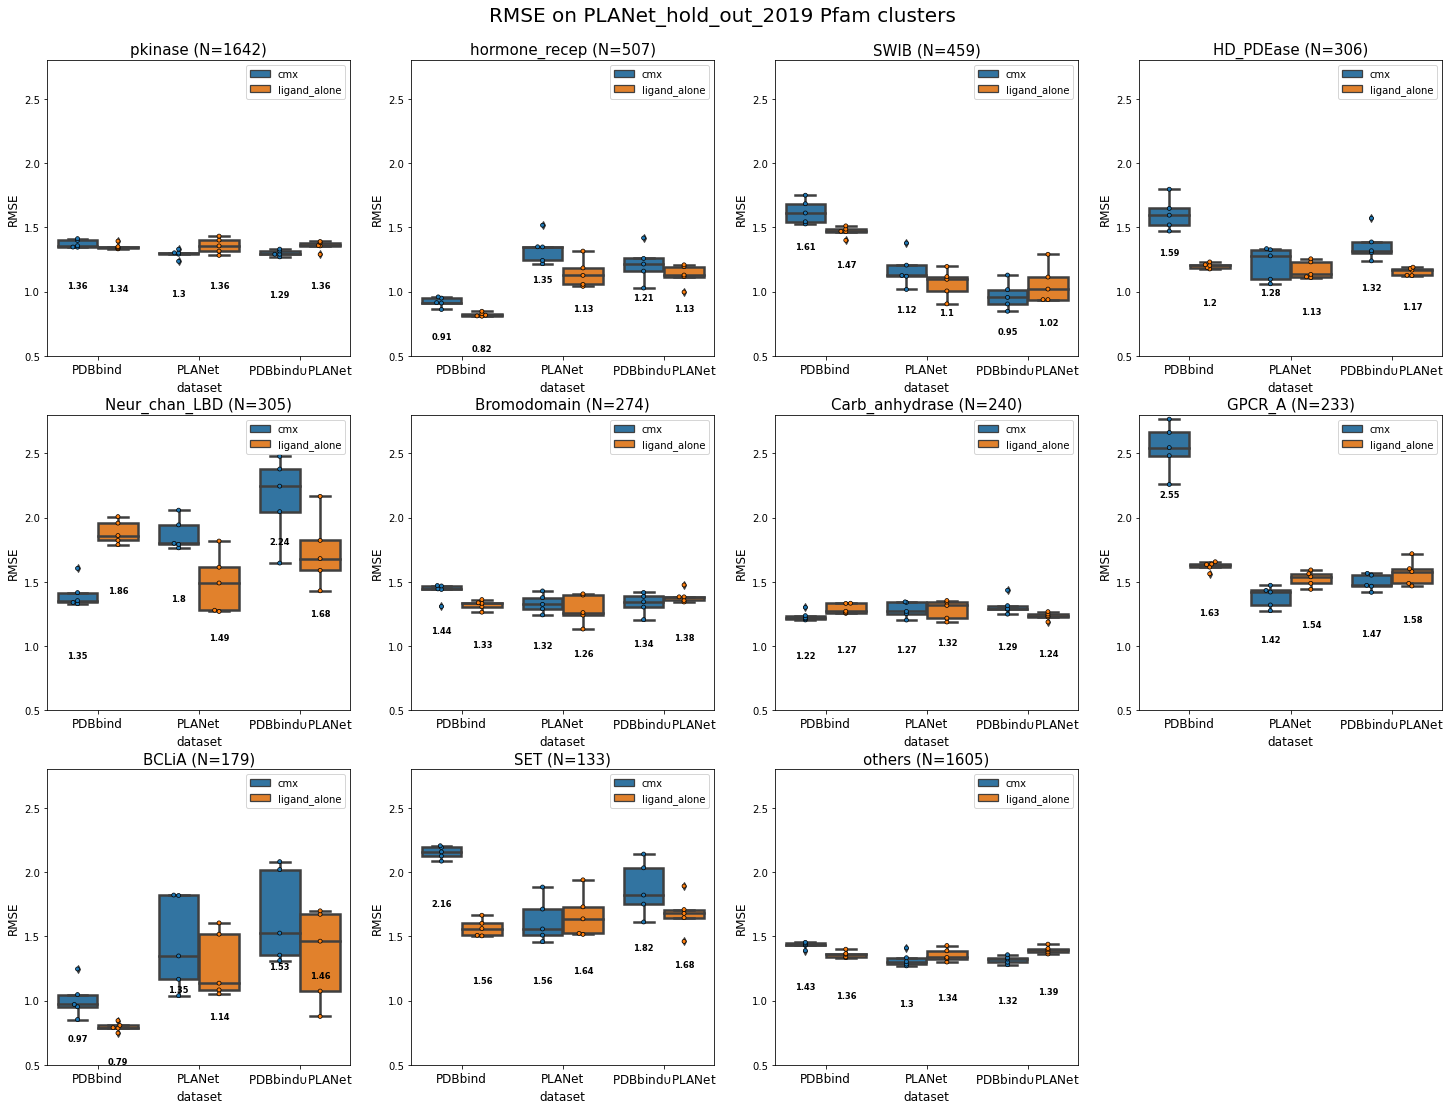

In [137]:
metric='rmse'
fig = plt.figure(figsize=(25,25))
for i, cluster in enumerate(top10_clusters+['others']):
    cluster_sum_df = pfam_sum_df[pfam_sum_df['cluster']==cluster]
    grouped_median_cluster = cluster_sum_df.groupby(['dataset', 'type']).median().reset_index()
    grouped_median_cluster['model_name'] = [f'{row.dataset}_{row.type}' for row in grouped_median_cluster.itertuples()]
    
    ax = fig.add_subplot(4, 4, i+1)
    sns.boxplot(x="dataset", y=metric, data=cluster_sum_df, hue="type", order = models, linewidth=2.5)
    sns.swarmplot(x="dataset", y=metric, data=cluster_sum_df, hue="type", order = models, size = 4, dodge=True, edgecolor="black", linewidth=0.7)

    ax.set_title(f'{cluster} (N={cluster_11_count[cluster]})', fontsize=15)
    # fig.autofmt_xdate()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2])
    vertical_offset = cluster_sum_df[metric].median() * 0.25 # offset from median for display
    for i, modl in enumerate(models):
        for tp in ['cmx', 'ligand_alone']:
            median_metric = round(grouped_median_cluster.loc[(grouped_median_cluster['model_name'] == f'{modl}_{tp}')][metric].values[0], 2)
            if tp == 'cmx':
                ax.text(i-.2, median_metric-vertical_offset, median_metric, horizontalalignment='center',size='small', weight='semibold')
            else:
                ax.text(i+.2, median_metric-vertical_offset, median_metric, horizontalalignment='center',size='small',weight='semibold')
    ax.set_ylim(0.5,2.8)
    ax.set_xticklabels(['PDBbind', 'PLANet', 'PDBbind'+r'$\cup{}$' + 'PLANet'], fontsize=12)
    ax.set_ylabel('RMSE', fontsize=12)
    ax.set_xlabel('dataset', fontsize=12)
plt.suptitle('RMSE on PLANet_hold_out_2019 Pfam clusters', y=0.91, fontsize=20)
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/pfam_cluster/top10_clusters_{metric}_mean_of_5_repeat_models.png', dpi=300, bbox_inches='tight')
# plt.close()

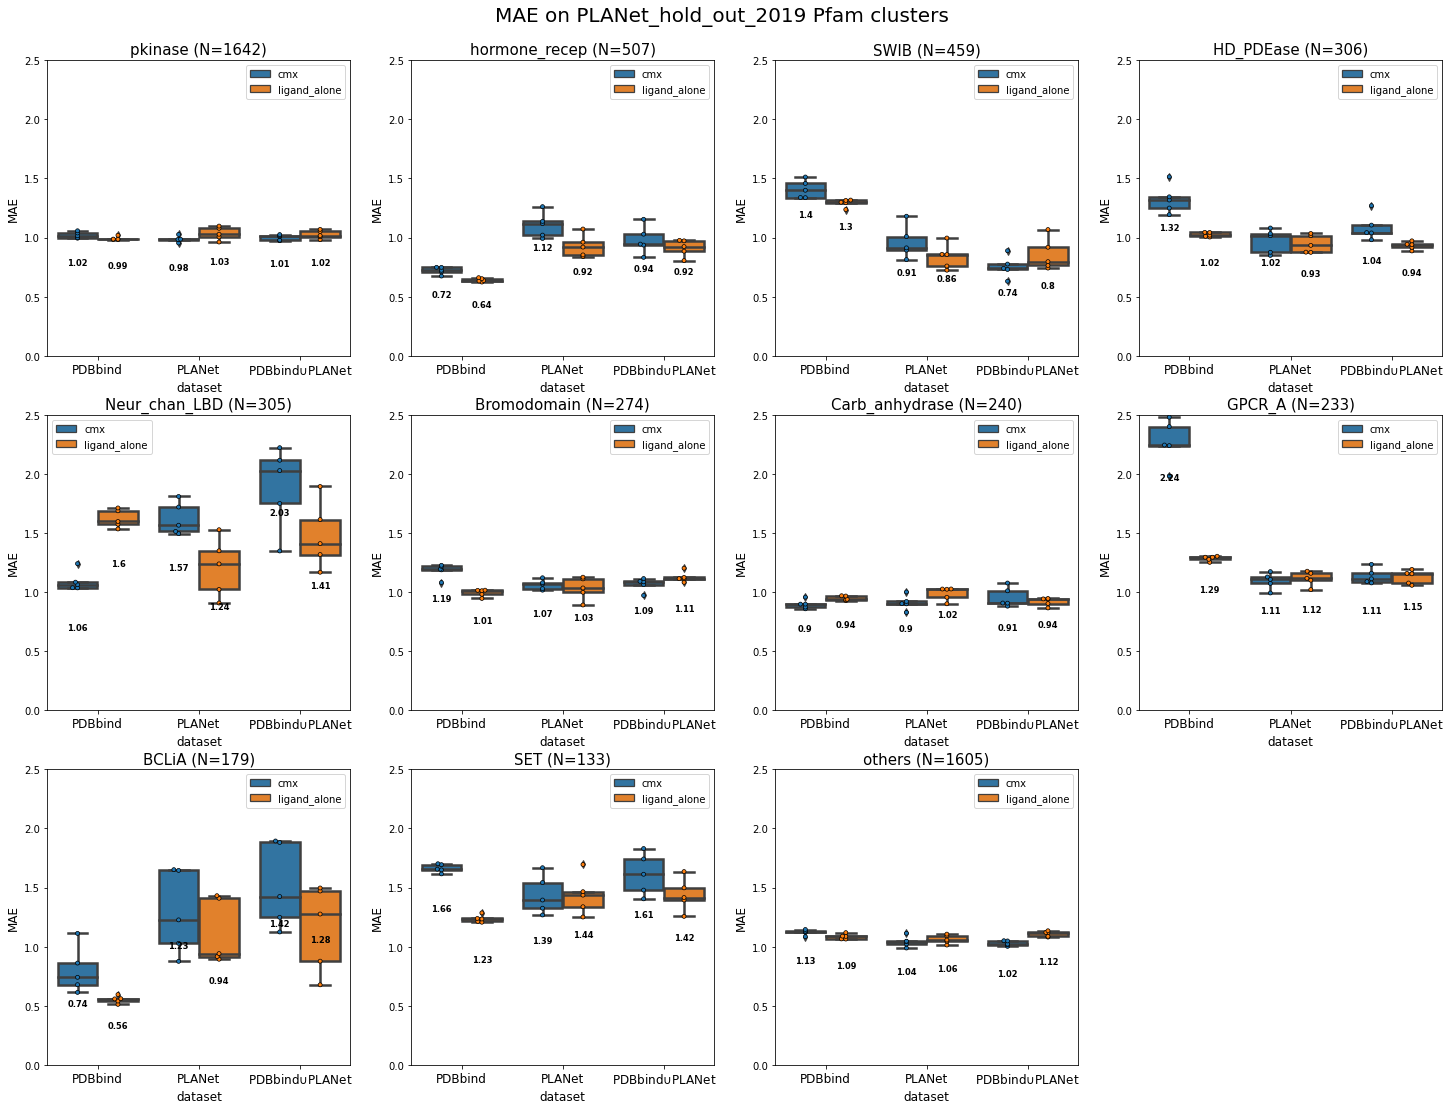

In [139]:
metric='mae'
fig = plt.figure(figsize=(25,25))
for i, cluster in enumerate(top10_clusters+['others']):
    cluster_sum_df = pfam_sum_df[pfam_sum_df['cluster']==cluster]
    grouped_median_cluster = cluster_sum_df.groupby(['dataset', 'type']).median().reset_index()
    grouped_median_cluster['model_name'] = [f'{row.dataset}_{row.type}' for row in grouped_median_cluster.itertuples()]
    
    ax = fig.add_subplot(4, 4, i+1)
    sns.boxplot(x="dataset", y=metric, data=cluster_sum_df, hue="type", order = models, linewidth=2.5)
    sns.swarmplot(x="dataset", y=metric, data=cluster_sum_df, hue="type", order = models, size = 4, dodge=True, edgecolor="black", linewidth=0.7)

    ax.set_title(f'{cluster} (N={cluster_11_count[cluster]})', fontsize=15)
    # fig.autofmt_xdate()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2])
    vertical_offset = cluster_sum_df[metric].median() * 0.25 # offset from median for display
    for i, modl in enumerate(models):
        for tp in ['cmx', 'ligand_alone']:
            median_metric = round(grouped_median_cluster.loc[(grouped_median_cluster['model_name'] == f'{modl}_{tp}')][metric].values[0], 2)
            if tp == 'cmx':
                ax.text(i-.2, median_metric-vertical_offset, median_metric, horizontalalignment='center',size='small', weight='semibold')
            else:
                ax.text(i+.2, median_metric-vertical_offset, median_metric, horizontalalignment='center',size='small',weight='semibold')
    ax.set_ylim(0,2.5)
    ax.set_xticklabels(['PDBbind', 'PLANet', 'PDBbind'+r'$\cup{}$' + 'PLANet'], fontsize=12)
    ax.set_ylabel('MAE', fontsize=12)
    ax.set_xlabel('dataset', fontsize=12)
plt.suptitle('MAE on PLANet_hold_out_2019 Pfam clusters', y=0.91, fontsize=20)
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/pfam_cluster/top10_clusters_{metric}_mean_of_5_repeat_models.png', dpi=300, bbox_inches='tight')
# plt.close()

In [156]:
PLANet_hold_property_Pfam.columns

Index(['index', 'unique_identify', '-logAffi', 'Target_chembl_id',
       'Cry_lig_name', 'Cry_lig_smiles', 'Cry_lig_an', 'Similar_compnd_name',
       'Similar_compnd_smiles', 'Similar_compnd_an', 'Similarity', 'Core_num',
       'Diff_an', 'Part_fix', 'Total_sampled_num', 'Similar_compnd_conform',
       'Total_delta', 'Lig_delta', 'Core_RMSD', 'MolWt', 'MCS_smarts',
       'target_compnd', 'mw', 'logp', 'rotb', 'hbd', 'hba', 'q', 'HA',
       'dataset', 'PCV_cluster'],
      dtype='object')

In [157]:
PLANet_hold_property_Pfam[['unique_identify', 'PCV_cluster']]

,unique_identify,PCV_cluster
0,CHEMBL1075159_5vfd_CHEMBL4298137,Beta-lactamase
1,CHEMBL1075317_6dar_CHEMBL4276691,Beta_propeller
2,CHEMBL1075317_6dar_CHEMBL4276791,Beta_propeller
3,CHEMBL1075317_6dar_CHEMBL4276998,Beta_propeller
4,CHEMBL1075317_6dar_CHEMBL4277278,Beta_propeller
...,...,...
5878,CHEMBL6154_5nut_CHEMBL4290134,ADP-ribosyl
5879,CHEMBL6154_5nut_CHEMBL4447252,ADP-ribosyl
5880,CHEMBL6154_5nut_CHEMBL4455904,ADP-ribosyl
5881,CHEMBL6154_5nut_CHEMBL4475367,ADP-ribosyl


In [160]:
mean_pred_df_with_prop_pfam = mean_pred_df_with_prop.merge(PLANet_hold_property_Pfam[['unique_identify', 'PCV_cluster']], on=['unique_identify']).copy()
len(mean_pred_df_with_prop_pfam)

5848

In [166]:
from pathlib import Path

In [187]:
for cluster in top10_clusters:
    cluster_dir = f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/mean_of_5_models/pfam_cluster/{cluster}'
    if not Path(cluster_dir).exists():
        Path(cluster_dir).mkdir()
    
    hold_out_cluster_mean_pred = mean_pred_df_with_prop_pfam[mean_pred_df_with_prop_pfam['PCV_cluster']==cluster].copy()

    hold_out_cluster_mean_pred_melted = hold_out_cluster_mean_pred[['unique_identify', 'y_true', 'PDBbind_minimized_v18_subset_cmx_mean', 'PLANet_v18_cmx_mean']].melt(id_vars=['unique_identify', 'y_true'], var_name='model')
    fig, ax = plt.subplots(figsize=(6,6))
    sns.scatterplot(data=hold_out_cluster_mean_pred_melted, x="y_true", y="value", hue='model')
    lims = [
            np.min([ax.get_xlim(), ax.get_ylim()]),
            np.max([ax.get_xlim(), ax.get_ylim()]),
        ]
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.plot(lims, lims, "k-", alpha=0.75, zorder=0)
    plt.xlabel("Experimental binding affinity")
    plt.ylabel("Predicted binding affinity")
    plt.title(f'PLANet_hold_out_2019 {cluster} cluster (N={len(hold_out_cluster_mean_pred)})')
    handles, labels = ax.get_legend_handles_labels()
    # ax.legend(handles[:2], labels[:2], loc='upper left')
    ax.legend(handles[:2], [f'PDBbind_v18_subset_cmx_mean_Rp_{round(stats.pearsonr(hold_out_cluster_mean_pred["y_true"], hold_out_cluster_mean_pred["PDBbind_minimized_v18_subset_cmx_mean"])[0], 3)}_MAE_{round(mean_absolute_error(hold_out_cluster_mean_pred[f"y_true"], hold_out_cluster_mean_pred["PDBbind_minimized_v18_subset_cmx_mean"]), 3)}', f'PLANet_v18_cmx_mean_Rp_{round(stats.pearsonr(hold_out_cluster_mean_pred["y_true"], hold_out_cluster_mean_pred["PLANet_v18_cmx_mean"])[0], 3)}_MAE_{round(mean_absolute_error(hold_out_cluster_mean_pred[f"y_true"], hold_out_cluster_mean_pred["PLANet_v18_cmx_mean"]), 3)}'], loc='lower right')
    plt.savefig(f'{cluster_dir}/{cluster}_scatter_PLANet_vs_PIP_cmx_mean.png', dpi=300, bbox_inches='tight')
    plt.close()

    for prop in ['mw', 'logp', 'HA']:
        fig, ax = plt.subplots(figsize=(6,6))
        sns.regplot(data=hold_out_cluster_mean_pred, x=prop, y="y_true")

        plt.xlabel(prop)
        plt.ylabel("Experimental pAffi")
        plt.title(f'PLANet_hold_out_2019 {cluster} cluster (N={len(hold_out_cluster_mean_pred)})\nRp={round(stats.pearsonr(hold_out_cluster_mean_pred[prop], hold_out_cluster_mean_pred["y_true"])[0], 3)}, Rs={round(stats.spearmanr(hold_out_cluster_mean_pred[prop], hold_out_cluster_mean_pred["y_true"])[0], 3)}')
        handles, labels = ax.get_legend_handles_labels()
        # ax.legend(handles[:2], labels[:2], loc='upper left')
        plt.savefig(f'{cluster_dir}/{cluster}_scatter_{prop}_experimental_pAffi.png', dpi=300, bbox_inches='tight')
        plt.close()

        fig = plt.figure(figsize=(16,16))
        for i, model in enumerate(models):
            for j, tp in enumerate(tps):
                # print((i+1)+6*j)
                ax = fig.add_subplot(3, 3, (i+1)+3*j)
                # fig, ax = plt.subplots(figsize=(6,6))
                # sns.scatterplot(x='mw', y=f'{model}_{tp}_mean', data=hold_out_hdpdease_mean_pred)
                sns.regplot(x=prop, y=f'{model}_{tp}_mean', data=hold_out_cluster_mean_pred)

                # ax.set_xlim(0, 600)
                # ax.set_ylim(5.5,10)
                ax.set_ylabel(f'mean_predicted pAffi')
                ax.set_xlabel(prop)
                ax.set_title(f'{simple_dict[model]}_{tp}\npearsonr={round(stats.pearsonr(hold_out_cluster_mean_pred[f"{model}_{tp}_mean"], hold_out_cluster_mean_pred[prop])[0], 3)}, spearmanr={round(stats.spearmanr(hold_out_cluster_mean_pred[f"{model}_{tp}_mean"], hold_out_cluster_mean_pred[prop])[0], 3)}')

        plt.subplots_adjust(left=0.125,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.93, 
                            wspace=0.2, 
                            hspace=0.35)
        plt.suptitle(f'Relationship between mean_predict and {prop} on {cluster} cluster (N={len(hold_out_cluster_mean_pred)})')
        plt.savefig(f'{cluster_dir}/{prop}_pred_pAffi_for_6_models.png', dpi=300, bbox_inches='tight')
        plt.close()


In [161]:
cluster='pkinase'

In [167]:
cluster_dir = f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/mean_of_5_models/pfam_cluster/{cluster}'
if not Path(cluster_dir).exists():
    Path(cluster_dir).mkdir()

In [162]:
hold_out_cluster_mean_pred = mean_pred_df_with_prop_pfam[mean_pred_df_with_prop_pfam['PCV_cluster']==cluster].copy()
hold_out_cluster_mean_pred

,unique_identify,y_true,PDBbind_minimized_v18_subset_cmx_mean,PDBbind_minimized_v18_subset_lig_alone_mean,PLANet_v18_cmx_mean,PLANet_v18_lig_alone_mean,PDBbind_minimized_v18_subset_union_PLANet_v18_cmx_mean,PDBbind_minimized_v18_subset_union_PLANet_v18_lig_alone_mean,Target_chembl_id,Cry_lig_name,...,target_compnd,mw,logp,rotb,hbd,hba,q,HA,dataset,PCV_cluster
529,CHEMBL1908385_6b2p_CHEMBL4162308,8.89,7.146592,7.989426,7.274817,8.089713,8.341783,7.386527,CHEMBL1908385,6b2p,...,CHEMBL1908385_CHEMBL4162308,396.885,2.85000,5.0,3.0,7.0,0.0,25.0,PLANet,pkinase
530,CHEMBL1908385_6b2p_CHEMBL4162544,9.00,6.957435,8.056993,7.793295,8.132591,8.201333,7.423750,CHEMBL1908385,6b2p,...,CHEMBL1908385_CHEMBL4162544,380.430,2.33570,5.0,3.0,7.0,0.0,25.0,PLANet,pkinase
531,CHEMBL1908385_6b2p_CHEMBL4165984,8.70,6.897705,8.002208,7.419795,7.702653,8.690466,6.934443,CHEMBL1908385,6b2p,...,CHEMBL1908385_CHEMBL4165984,387.450,2.06828,5.0,3.0,8.0,0.0,26.0,PLANet,pkinase
532,CHEMBL1908385_6b2p_CHEMBL4166160,9.00,6.972619,8.110996,7.742889,8.012636,8.048015,8.175905,CHEMBL1908385,6b2p,...,CHEMBL1908385_CHEMBL4166160,446.945,4.00320,5.0,3.0,7.0,0.0,29.0,PLANet,pkinase
533,CHEMBL1908385_6b2p_CHEMBL4170479,8.40,7.042221,7.767022,7.253224,8.006537,8.108693,7.311951,CHEMBL1908385,6b2p,...,CHEMBL1908385_CHEMBL4170479,362.440,2.19660,5.0,3.0,7.0,0.0,24.0,PLANet,pkinase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690,CHEMBL5464_6c4d_CHEMBL4102622,8.60,6.839953,7.624989,6.213780,7.398659,6.060213,7.967110,CHEMBL5464,6c4d,...,CHEMBL5464_CHEMBL4102622,445.479,1.45260,4.0,1.0,6.0,0.0,33.0,PLANet,pkinase
5739,CHEMBL5879_5ywx_CHEMBL4238290,9.85,7.524043,7.120014,6.262640,7.248769,7.142836,6.211398,CHEMBL5879,5ywx,...,CHEMBL5879_CHEMBL4238290,359.389,2.91770,4.0,1.0,5.0,0.0,27.0,PLANet,pkinase
5743,CHEMBL5903_6gin_CHEMBL4237728,7.17,8.038082,7.074397,7.064482,7.452219,7.182181,6.896908,CHEMBL5903,6gin,...,CHEMBL5903_CHEMBL4237728,392.462,4.66690,3.0,0.0,5.0,0.0,30.0,PLANet,pkinase
5744,CHEMBL5903_6gin_CHEMBL4240187,6.37,7.765925,6.578664,6.918572,7.562757,6.584413,6.833604,CHEMBL5903,6gin,...,CHEMBL5903_CHEMBL4240187,349.393,4.60090,2.0,0.0,4.0,0.0,27.0,PLANet,pkinase


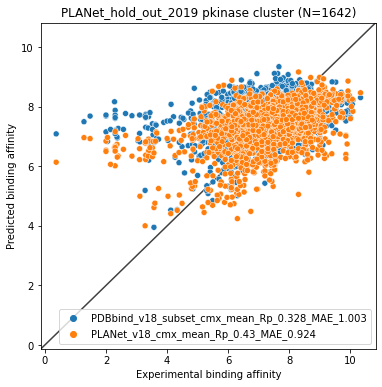

In [168]:
hold_out_cluster_mean_pred_melted = hold_out_cluster_mean_pred[['unique_identify', 'y_true', 'PDBbind_minimized_v18_subset_cmx_mean', 'PLANet_v18_cmx_mean']].melt(id_vars=['unique_identify', 'y_true'], var_name='model')

fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=hold_out_cluster_mean_pred_melted, x="y_true", y="value", hue='model')
lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.plot(lims, lims, "k-", alpha=0.75, zorder=0)
plt.xlabel("Experimental binding affinity")
plt.ylabel("Predicted binding affinity")
plt.title(f'PLANet_hold_out_2019 {cluster} cluster (N={len(hold_out_cluster_mean_pred)})')
handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[:2], labels[:2], loc='upper left')
ax.legend(handles[:2], [f'PDBbind_v18_subset_cmx_mean_Rp_{round(stats.pearsonr(hold_out_cluster_mean_pred["y_true"], hold_out_cluster_mean_pred["PDBbind_minimized_v18_subset_cmx_mean"])[0], 3)}_MAE_{round(mean_absolute_error(hold_out_cluster_mean_pred[f"y_true"], hold_out_cluster_mean_pred["PDBbind_minimized_v18_subset_cmx_mean"]), 3)}', f'PLANet_v18_cmx_mean_Rp_{round(stats.pearsonr(hold_out_cluster_mean_pred["y_true"], hold_out_cluster_mean_pred["PLANet_v18_cmx_mean"])[0], 3)}_MAE_{round(mean_absolute_error(hold_out_cluster_mean_pred[f"y_true"], hold_out_cluster_mean_pred["PLANet_v18_cmx_mean"]), 3)}'], loc='lower right')
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/mean_of_5_models/pfam_cluster/{cluster}/{cluster}_scatter_PLANet_vs_PIP_cmx_mean.png', dpi=300, bbox_inches='tight')

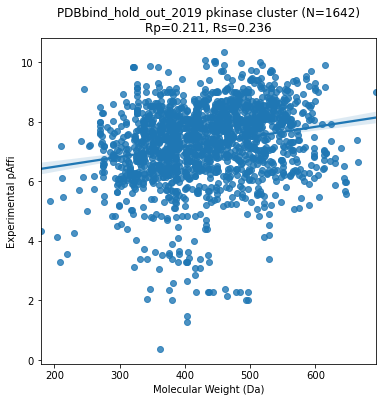

In [169]:
fig, ax = plt.subplots(figsize=(6,6))
sns.regplot(data=hold_out_cluster_mean_pred, x="mw", y="y_true")

plt.xlabel("Molecular Weight (Da)")
plt.ylabel("Experimental pAffi")
plt.title(f'PLANet_hold_out_2019 {cluster} cluster (N={len(hold_out_cluster_mean_pred)})\nRp={round(stats.pearsonr(hold_out_cluster_mean_pred["mw"], hold_out_cluster_mean_pred["y_true"])[0], 3)}, Rs={round(stats.spearmanr(hold_out_cluster_mean_pred["mw"], hold_out_cluster_mean_pred["y_true"])[0], 3)}')
handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[:2], labels[:2], loc='upper left')
# plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/mean_of_5_models/pfam_cluster/{cluster}/{cluster}_scatter_Mw_experimental_pAffi.png', dpi=300, bbox_inches='tight')

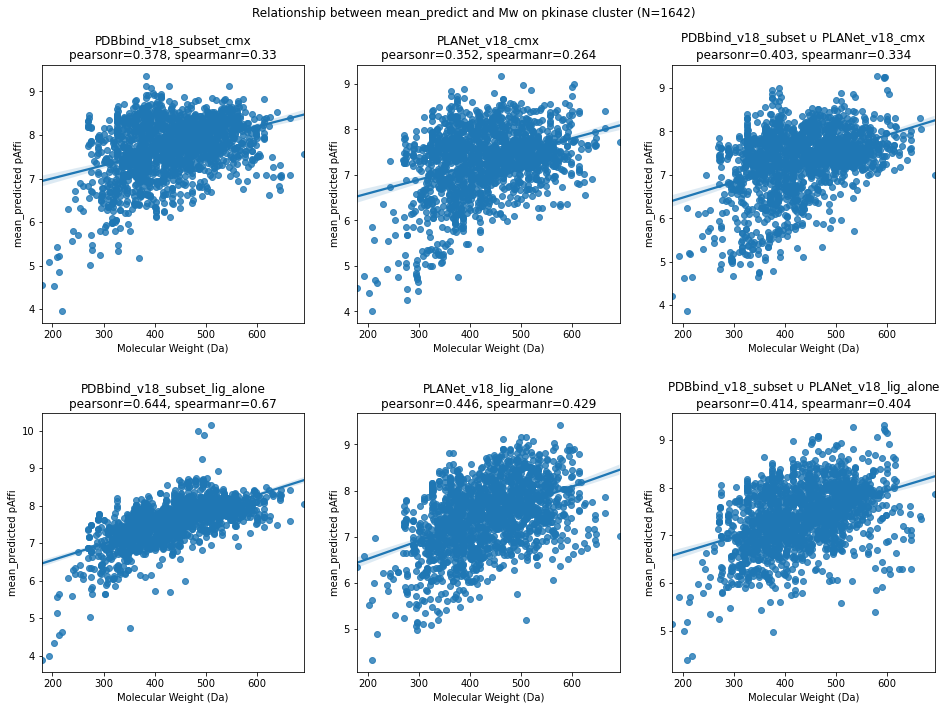

In [170]:
fig = plt.figure(figsize=(16,16))
for i, model in enumerate(models):
    for j, tp in enumerate(tps):
        # print((i+1)+6*j)
        ax = fig.add_subplot(3, 3, (i+1)+3*j)
        # fig, ax = plt.subplots(figsize=(6,6))
        # sns.scatterplot(x='mw', y=f'{model}_{tp}_mean', data=hold_out_hdpdease_mean_pred)
        sns.regplot(x='mw', y=f'{model}_{tp}_mean', data=hold_out_cluster_mean_pred)

        # ax.set_xlim(0, 600)
        # ax.set_ylim(5.5,10)
        ax.set_ylabel(f'mean_predicted pAffi')
        ax.set_xlabel('Molecular Weight (Da)')
        ax.set_title(f'{simple_dict[model]}_{tp}\npearsonr={round(stats.pearsonr(hold_out_cluster_mean_pred[f"{model}_{tp}_mean"], hold_out_cluster_mean_pred["mw"])[0], 3)}, spearmanr={round(stats.spearmanr(hold_out_cluster_mean_pred[f"{model}_{tp}_mean"], hold_out_cluster_mean_pred["mw"])[0], 3)}')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.93, 
                    wspace=0.2, 
                    hspace=0.35)
plt.suptitle(f'Relationship between mean_predict and Mw on {cluster} cluster (N={len(hold_out_cluster_mean_pred)})')
# plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/hold_out_2019/4-evaluation/test_on_PLANet_hold_out_2019/mean_of_5_models/pfam_cluster/{cluster}/Mw_pred_pAffi_for_6_models.png', dpi=300, bbox_inches='tight')